In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import MultiPolygon, Polygon
import seaborn as sns
sns.set()

In [2]:
# removed cagtegory then modify pc and add young and old candidate
#try to use seaborn in place of numpy at most places

In [3]:
candidate_2019=pd.read_csv('lok_sabha_candidates_data.csv')
candidate_2019.head(10)

,State,Constituency,Name,Winner,Party,Symbol,Gender,Criminal Cases,Age,Category,Education,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414 ~ 30 Lacs+","Rs 2,31,450 ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888 ~ 1 Crore+","Rs 8,47,000 ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000 ~ 3 Crore+","Rs 1,53,00,000 ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036 ~ 7 Crore+","Rs 86,06,522 ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385 ~ 13 Crore+","Rs 2,22,51,891 ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753 ~ 5 Crore+",Rs 0 ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576 ~ 16 Crore+","Rs 26,23,964 ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381 ~ 9 Crore+","Rs 3,25,49,132 ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000 ~ 1 Crore+","Rs 14,00,000 ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396


In [4]:
candidate_2019 = candidate_2019[candidate_2019["Name"]!="NOTA"]
candidate_2019["Name"] = [x.title() for x in candidate_2019["Name"]]

# remove category annotation with Constituency name
candidate_2019["Constituency"] = [x[0].strip() for x in candidate_2019["Constituency"].str.split('(')]

In [5]:
# Cleanup Assets and Liabiities columns
candidate_2019["Assets"].fillna("0",inplace=True)
candidate_2019["Assets"].replace(["Nil","NIL","Not Available","`"],"0",inplace=True)
candidate_2019["Assets"] = [float(x.split("~")[0].split("Rs")[-1].replace(",","")) for x in candidate_2019["Assets"]]

candidate_2019["Liabilities"].fillna("0",inplace=True)
candidate_2019["Liabilities"].replace(["Nil","NIL","Not Available","`"],"0",inplace=True)
candidate_2019["Liabilities"] = [float(x.split("~")[0].split("Rs")[-1].replace(",","")) for x in candidate_2019["Liabilities"]]


In [6]:
pc_map=gpd.read_file("map\parliamentary-constituencies\india_pc_2019.shp")
pc_map.head()

,ST_NAME,PC_NAME,ST_CODE,PC_CODE,Res,geometry
0,HIMACHAL PRADESH,KANGRA,02,1,GEN,"POLYGON ((76.57659 33.20606, 76.57785 33.20599..."
1,HIMACHAL PRADESH,MANDI,02,2,GEN,"POLYGON ((76.79468 33.25638, 76.79541 33.25622..."
2,HIMACHAL PRADESH,HAMIRPUR,02,3,GEN,"POLYGON ((76.02031 32.13977, 76.02143 32.13831..."
3,HIMACHAL PRADESH,SHIMLA (SC),02,4,SC,"POLYGON ((78.09421 31.41866, 78.09557 31.41853..."
4,PUNJAB,GURDASPUR,03,1,GEN,"POLYGON ((75.84332 32.50309, 75.84375 32.50236..."


In [7]:
set(candidate_2019.groupby("Constituency").groups.keys()).symmetric_difference(set(pc_map.groupby("PC_NAME").groups.keys()))

{'ADILABAD',
 'ADILABAD(ST)',
 'AGRA',
 'AGRA (SC)',
 'AHMADNAGAR',
 'AHMEDABAD WEST',
 'AHMEDABAD WEST(SC)',
 'AHMEDNAGAR',
 'ALATHUR',
 'ALATHUR (SC)',
 'ALIPURDUARS',
 'ALIPURDUARS (ST)',
 'ALMORA',
 'ALMORA (SC)',
 'AMALAPURAM',
 'AMALAPURAM (SC)',
 'AMBALA',
 'AMBALA (SC)',
 'AMRAVATI',
 'AMRAVATI (SC)',
 'ANAKAPALLE',
 'ANAKAPALLI',
 'ANDAMAN & NICOBAR',
 'ANDAMAN & NICOBAR ISLANDS',
 'ARAKU (ST)',
 'ARAMBAG (SC)',
 'ARAMBAGH',
 'ARUKU',
 'AUTONOMOUS DISTRICT',
 'AUTONOMOUS DISTRICT (ST)',
 'BAHRAICH',
 'BAHRAICH (SC)',
 'BANGAON',
 'BANGAON (SC)',
 'BANSGAON',
 'BANSGAON (SC)',
 'BANSWARA',
 'BANSWARA(ST)',
 'BAPATLA',
 'BAPATLA (SC)',
 'BARABANKI',
 'BARABANKI (SC)',
 'BARDHAMAN DURGAPUR',
 'BARDHAMAN PURBA',
 'BARDHAMAN PURBA(SC)',
 'BARDHAMAN-DURGAPUR',
 'BARDOLI',
 'BARDOLI (ST)',
 'BARRACKPORE',
 'BARRACKPUR',
 'BASTAR',
 'BASTAR (ST)',
 'BELLARY',
 'BELLARY (ST)',
 'BETUL',
 'BETUL (ST)',
 'BHADRAK',
 'BHADRAK (SC)',
 'BHANDARA - GONDIYA',
 'BHANDARA-GONDIYA',
 'BHARATPUR'

In [8]:

# remove category annotation with PC_NAME name
pc_map["PC_NAME"] = [x[0].strip() for x in pc_map["PC_NAME"].str.split('(')]

In [9]:
set(candidate_2019.groupby("Constituency").groups.keys()).symmetric_difference(set(pc_map.groupby("PC_NAME").groups.keys()))

{'AHMADNAGAR',
 'AHMEDNAGAR',
 'ANAKAPALLE',
 'ANAKAPALLI',
 'ANDAMAN & NICOBAR',
 'ANDAMAN & NICOBAR ISLANDS',
 'ARAKU',
 'ARAMBAG',
 'ARAMBAGH',
 'ARUKU',
 'BARDHAMAN DURGAPUR',
 'BARDHAMAN-DURGAPUR',
 'BARRACKPORE',
 'BARRACKPUR',
 'BHANDARA - GONDIYA',
 'BHANDARA-GONDIYA',
 'COOCH BEHAR',
 'COOCHBEHAR',
 'DADRA & NAGAR HAVELI',
 'DADRA AND NAGAR HAVELI',
 'KARAULI -DHOLPUR',
 'KARAULI-DHOLPUR',
 'MUMBAI NORTH CENTRAL',
 'MUMBAI NORTH EAST',
 'MUMBAI NORTH WEST',
 'MUMBAI NORTH-CENTRAL',
 'MUMBAI NORTH-EAST',
 'MUMBAI NORTH-WEST',
 'MUMBAI SOUTH -CENTRAL',
 'MUMBAI SOUTH CENTRAL',
 'PALAMAU',
 'PALAMU',
 'PONDICHERRY',
 'PUDUCHERRY',
 'RATNAGIRI - SINDHUDURG',
 'RATNAGIRI -SINDHUDURG',
 'SARGUJA',
 'SECUNDERABAD',
 'SECUNDRABAD',
 'SREERAMPUR',
 'SRERAMPUR',
 'SURGUJA',
 'THIRUVALLUR',
 'TIRUVALLUR',
 'TONK - SAWAI MADHOPUR',
 'TONK-SAWAI MADHOPUR',
 'VELLORE'}

In [10]:
state_map = gpd.read_file("archive\Igismap\Indian_States.shp")
state_map.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [11]:
# There are some naming and geographical issues that need 
# to be addressed to align state names in map data to Lok Sabha candidates data
set(candidate_2019.groupby("State").groups.keys()).symmetric_difference(set(state_map.groupby("st_nm").groups.keys()))

{'Andaman & Nicobar Island',
 'Andaman & Nicobar Islands',
 'Arunachal Pradesh',
 'Arunanchal Pradesh',
 'Dadara & Nagar Havelli',
 'Dadra & Nagar Haveli',
 'NCT OF Delhi',
 'NCT of Delhi'}

In [12]:

# renaming changes
state_map["st_nm"][state_map["st_nm"]=='Andaman & Nicobar Island'] = 'Andaman & Nicobar Islands'
state_map["st_nm"][state_map["st_nm"]=='NCT of Delhi'] = 'NCT OF Delhi'
state_map["st_nm"][state_map["st_nm"]=='Arunanchal Pradesh'] = 'Arunachal Pradesh'
state_map["st_nm"][state_map["st_nm"]=='Dadara & Nagar Havelli'] = 'Dadra & Nagar Haveli'


C:\Users\arpit\AppData\Local\Temp\ipykernel_24872\627771134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_map["st_nm"][state_map["st_nm"]=='Andaman & Nicobar Island'] = 'Andaman & Nicobar Islands'
C:\Users\arpit\AppData\Local\Temp\ipykernel_24872\627771134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_map["st_nm"][state_map["st_nm"]=='NCT of Delhi'] = 'NCT OF Delhi'
C:\Users\arpit\AppData\Local\Temp\ipykernel_24872\627771134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [13]:
# state_map.loc[len(state_map)] = ["Dadra & Nagar Haveli",MultiPolygon(state_map[state_map["st_nm"]=="Dadra and Nagar Haveli and Daman and Diu"]["geometry"].values[0][1:])]
# state_map.loc[len(state_map)] = ["Daman & Diu",state_map[state_map["st_nm"]=="Dadra and Nagar Haveli and Daman and Diu"]["geometry"].values[0][0]]
# state_map["geometry"][state_map["st_nm"]=="Jammu & Kashmir"] = MultiPolygon([state_map[state_map["st_nm"]=="Jammu & Kashmir"]["geometry"].values[0],state_map[state_map["st_nm"]=="Ladakh"]["geometry"].values[0]])

state_map = state_map[~state_map.st_nm.isin(["Dadra and Nagar Haveli and Daman and Diu","Ladakh"])]

state_map.set_index("st_nm",inplace=True)

In [14]:
# state_wise_assets = pd.merge(pc_map, pd.DataFrame(candidate_2019.groupby("Constituency")["Assets"].median()), left_index=True, right_index=True)

# fig, ax = plt.subplots(1, figsize=(6, 6))
# ax.axis('off')
# ax.set_title('Median Assets across States', fontsize=18)
# state_wise_assets.plot(column='Assets', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
# # plt.savefig("assets/median_assets_states.jpg",bbox_inches = "tight")

In [15]:
state_df = candidate_2019[['State','Constituency','Total Electors']]

fig = px.sunburst(state_df, 
                        path=['State','Constituency'], 
                        values='Total Electors',
                        color='Total Electors',
                        color_continuous_scale='Oryel')
fig.update_layout(title_text='State and Constituency by Total Electors',
                         xaxis_title="Party",yaxis_title="Seats")
fig.show()


In [16]:
major_parties = list(candidate_2019["Party"].value_counts().sort_values().index[-16:])
major_parties
# candidate_2019["Party"].value_counts()

['AIADMK',
 'DMK',
 'YSRCP',
 'AAP',
 'TDP',
 'SHS',
 'MNM',
 'NTK',
 'SP',
 'VBA',
 'AITC',
 'CPI(M)',
 'BSP',
 'IND',
 'INC',
 'BJP']

In [17]:
# # Number of seats won by each party
# result = candidate_2019.groupby('Party').size()
# result_df = pd.DataFrame(data=result).sort_values(by="Winner", ascending=False)
# result_df.reset_index(level=0, inplace=True)

# # Visualize the party-wise election results
# result_fig = px.bar(result_df, 
#                     x=result_df['Party'][:20], 
#                     y=result_df["Winner"][:20], 
#                     color=result_df['Winner'][:20], 
#                     # height=500,
#                     color_continuous_scale='Oryel')
# result_fig.update_layout(title_text='Top 20 Party-wise election results',
#                          font_family="Courier New",
#                          font_color="#351f39",
#                          title_font_family="Courier New",
#                          title_font_color="#351f39",
#                          xaxis_title="Party",
#                          yaxis_title="Seats")
# result_fig.show()

In [18]:
# Number of seats won by each party
result = candidate_2019[candidate_2019["Winner"]==1].groupby('Party')['Winner'].size()
total = candidate_2019.groupby('Party')['Winner'].size()
result_df = pd.DataFrame(data=result)
result_df["Total Party Candidate"]=total
# result_df["Winning Percentage"]=(result_df["Winner"]/result_df["Total Party Candidate"])*100
result_df=result_df.sort_values(by="Total Party Candidate", ascending=False)[:20]

result_df.reset_index(level=0, inplace=True)
result_df.head()


,Party,Winner,Total Party Candidate
0,BJP,300,420
1,INC,52,413
2,IND,4,201
3,BSP,11,163
4,CPI(M),5,100


In [19]:
# # Number of seats won by each party
# result = candidate_2019[candidate_2019["Winner"]==1].groupby('Party')['Winner'].size()
# total = candidate_2019.groupby('Party')['Winner'].size()
# result_win_df = pd.DataFrame(data=result)

# result_df= pd.DataFrame(data=total)
# # result_df["Winning Percentage"]=(result_df["Winner"]/result_df["Total Party Candidate"])*100
# result_df=result_df.sort_values(by="Total Party Candidate", ascending=False)[:20]

# result_df.reset_index(level=0, inplace=True)
# result_df.head()


In [20]:
d2 = result_df.melt(id_vars="Party", var_name="seats")
d2.head()

,Party,seats,value
0,BJP,Winner,300
1,INC,Winner,52
2,IND,Winner,4
3,BSP,Winner,11
4,CPI(M),Winner,5


Text(0.5, 1.0, 'Top 20 Party-wise election results')

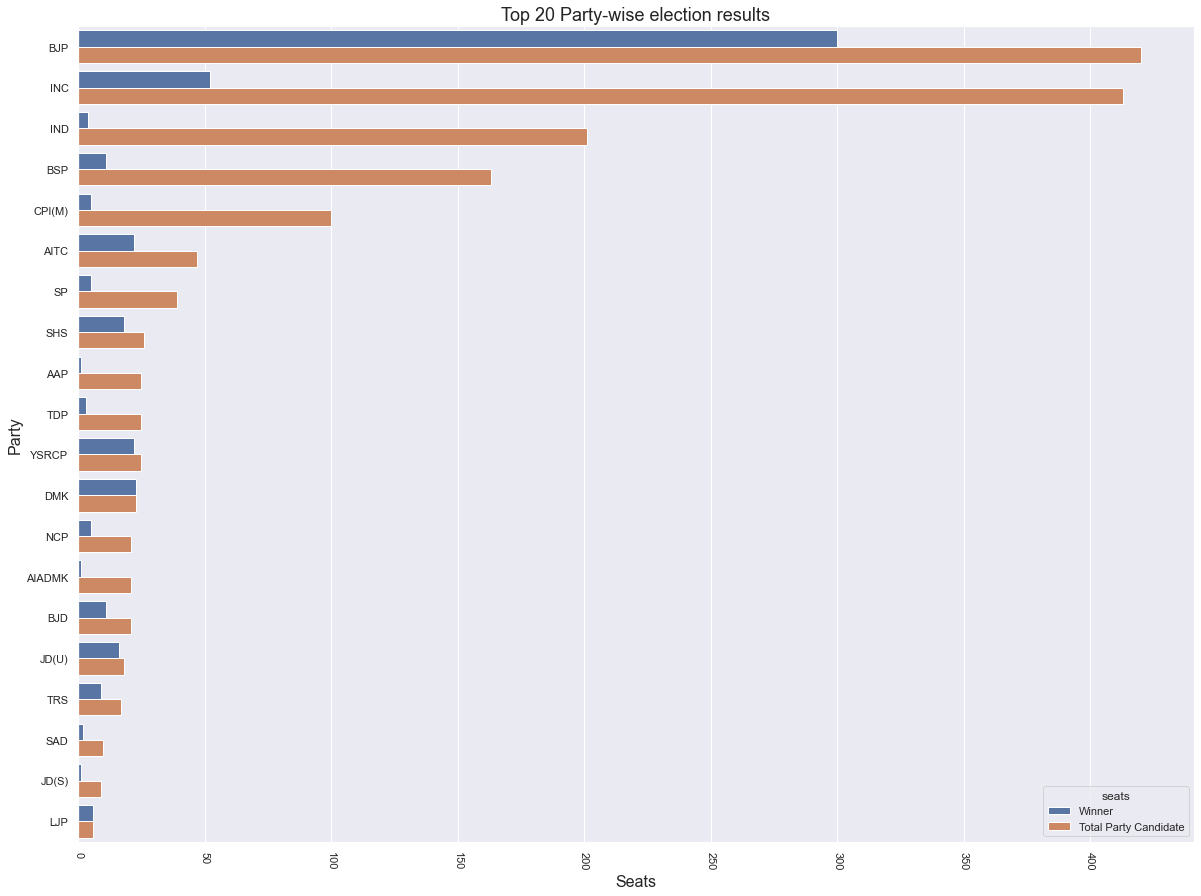

In [21]:
fig = plt.subplots(figsize=(20,15))
# ax = sns.barplot(x=d2["value"],y=d2["Party"], hue=d2["seats"], data=d2, dodge=False)
ax=sns.barplot(data=d2,y='Party',x='value', hue='seats')
plt.xticks(rotation=270)
ax.set_ylabel("Party",fontsize=16)
ax.set_xlabel("Seats",fontsize=16)
ax.set_title("Top 20 Party-wise election results",fontsize=18)
# plt.savefig("pic/party/win_candidate.jpg",bbox_inches = "tight")

In [22]:
vote_Share = candidate_2019.groupby('Party')['Total Votes'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="Total Votes", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)
def sort_party(data):
    if data['Party'] not in major_parties:
        return 'Other'
    else:
        return data['Party']

# Calling the method
vote_Share_df['Party New'] = vote_Share_df.apply(sort_party, axis=1)
vote_count = vote_Share_df.groupby('Party New')['Total Votes'].sum()
vote_Share_df.head()

,Party,Total Votes,Party New
0,BJP,228938556,BJP
1,INC,119418722,INC
2,AITC,24832104,AITC
3,BSP,20808194,BSP
4,SP,15616282,SP


Text(0.5, 1.0, 'Party-wise Vote Share')

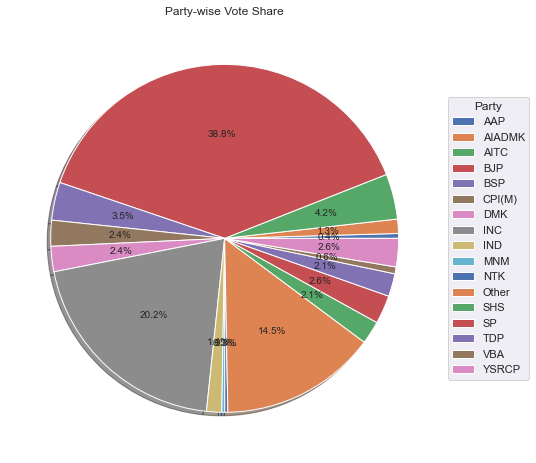

In [23]:
fig, axes = plt.subplots(figsize=(8,8))
axes.pie(vote_count.values, explode =None ,  autopct='%1.1f%%' , shadow=True)
axes.legend( vote_count.index, title="Party", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title("Party-wise Vote Share")
# plt.savefig("pic/gender/gender_candidate.jpg",bbox_inches = "tight")


In [24]:
seat_Share = candidate_2019[candidate_2019['Winner']==1].groupby('Party').sum()
seat_Share_df = pd.DataFrame(data=seat_Share, index=seat_Share.index)
seat_Share_df.reset_index(level=0, inplace=True)
def sort_party(data):
    if data['Party'] not in major_parties:
        return 'Other'
    else:
        return data['Party']

# Calling the method
seat_Share_df['Party New'] = seat_Share_df.apply(sort_party, axis=1)

seat_Share_df.head()

C:\Users\arpit\AppData\Local\Temp\ipykernel_24872\3402393475.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Party,Winner,Age,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors,Party New
0,AAP,1,45.0,1.642727e+07,0.0,412201,1360,413561,27.040187,37.350080,1529431,AAP
1,ADAL,2,103.0,4.994874e+07,2489736.0,1038558,920,1039478,58.048538,98.637835,3568688,Other
2,AIADMK,1,39.0,6.580323e+07,32734079.0,503459,1354,504813,32.338249,42.962516,1561040,AIADMK
3,AIMIM,2,99.0,2.086071e+08,127300000.0,906023,490,906513,47.054265,91.396028,3844215,Other
4,AITC,22,1187.0,1.353071e+09,74667802.0,14436811,11106,14447917,858.313637,1058.082169,37001621,AITC


In [25]:
seat_count = seat_Share_df.groupby('Party New').sum()
seat_count.reset_index(level=0, inplace=True)
seat_count

C:\Users\arpit\AppData\Local\Temp\ipykernel_24872\3158218683.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Party New,Winner,Age,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors
0,AAP,1,45.0,1.642727e+07,0.000000e+00,412201,1360,413561,27.040187,37.350080,1529431
1,AIADMK,1,39.0,6.580323e+07,3.273408e+07,503459,1354,504813,32.338249,42.962516,1561040
2,AITC,22,1187.0,1.353071e+09,7.466780e+07,14436811,11106,14447917,858.313637,1058.082169,37001621
3,BJP,300,16441.0,4.332100e+10,7.845759e+09,190085104,878691,190963795,10967.936307,16529.650628,523882955
4,BSP,11,549.0,3.422046e+09,1.077795e+09,5453872,10292,5464164,308.638619,505.329942,19571722
5,CPI(M),5,305.0,4.997320e+07,7.206249e+06,2480285,15527,2495812,164.437049,228.078510,7688294
6,DMK,23,1284.0,5.637461e+09,8.567371e+08,13789892,88100,13877992,912.145374,1251.466256,35210396
7,INC,52,2877.0,1.976019e+10,2.673794e+09,26217060,72906,26289966,1787.326942,2445.342617,77646595
8,IND,4,194.0,1.080609e+09,1.222525e+08,1782966,6622,1789588,132.417550,175.063404,5571482
9,Other,72,3908.0,1.893164e+10,2.956648e+09,35521229,90427,35611656,2274.712457,3536.521896,114129977


Text(0.5, 1.0, 'Party-wise Lok Sabha Seat Share')

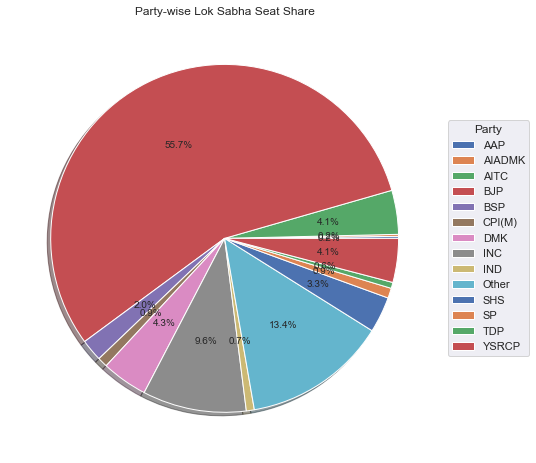

In [26]:
fig, axes = plt.subplots(figsize=(8,8))
axes.pie(seat_count["Winner"], explode =None ,  autopct='%1.1f%%' , shadow=True)
axes.legend( seat_count["Party New"], title="Party", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title("Party-wise Lok Sabha Seat Share")
# plt.savefig("pic/gender/gender_candidate.jpg",bbox_inches = "tight")

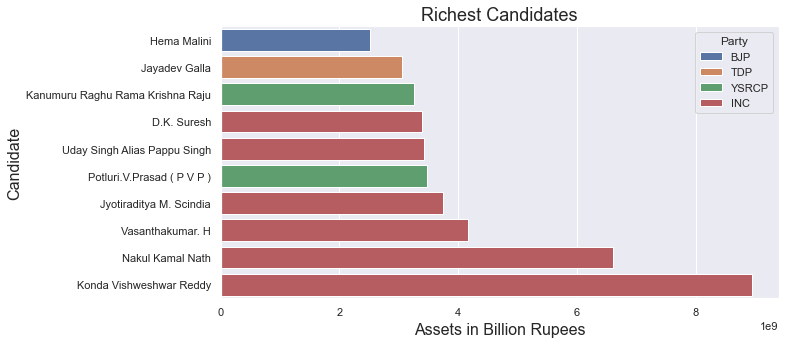

In [27]:
richest_candidates = candidate_2019.loc[candidate_2019["Assets"].sort_values().index[-10:]]
fig,ax = plt.subplots(1,figsize=(10,5))
ax = sns.barplot(y="Name",x="Assets", hue="Party", data=richest_candidates, dodge=False)
ax.set_ylabel("Candidate",fontsize=16)
ax.set_xlabel("Assets in Billion Rupees",fontsize=16)
ax.set_title("Richest Candidates",fontsize=18)
plt.savefig("pic/assets/richest.jpg",bbox_inches = "tight")


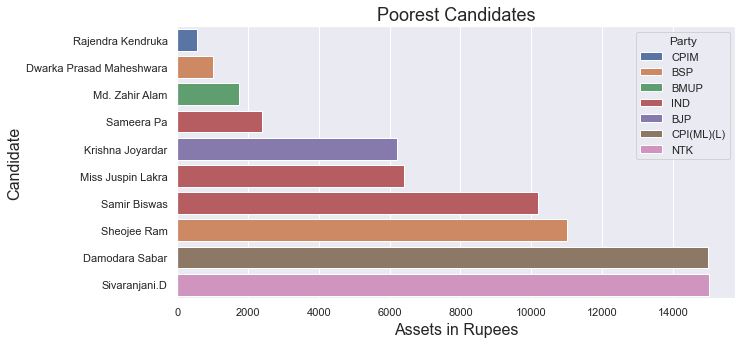

In [28]:
poorest_candidates = candidate_2019[candidate_2019["Assets"]>0]
poorest_candidates = poorest_candidates.loc[poorest_candidates["Assets"].sort_values().index[:10]]
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(y="Name",x="Assets",hue="Party", data=poorest_candidates, orient="h", dodge=False)
ax.set_ylabel("Candidate",fontsize=16)
ax.set_xlabel("Assets in Rupees",fontsize=16)
ax.set_title("Poorest Candidates",fontsize=18)
plt.savefig("pic/assets/poorest.jpg",bbox_inches = "tight")

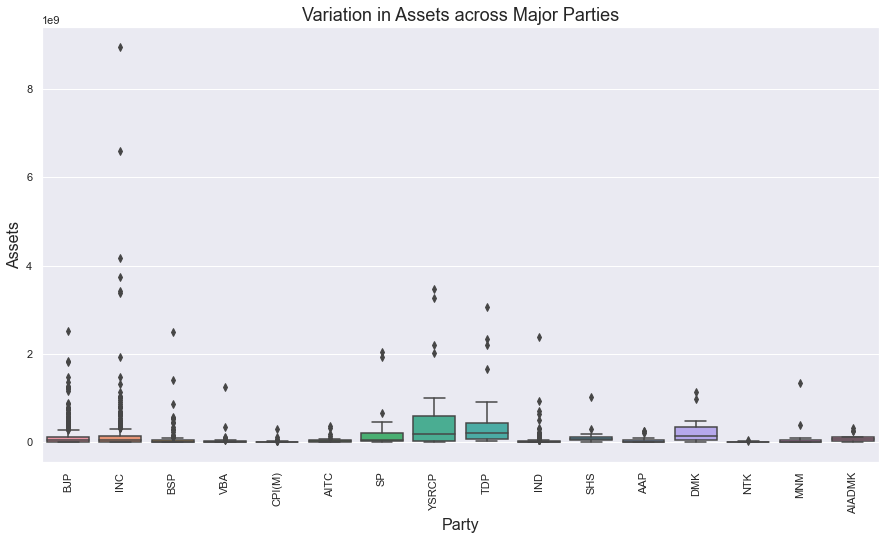

In [29]:
fig,ax = plt.subplots(1,figsize=(15,8))
ax = sns.boxplot(x="Party",y="Assets",data=candidate_2019[candidate_2019["Party"].isin(major_parties)],ax=ax)
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Assets",fontsize=16)
ax.set_title("Variation in Assets across Major Parties",fontsize=18)
plt.savefig("pic/assets/major_party_assets.jpg",bbox_inches = "tight")

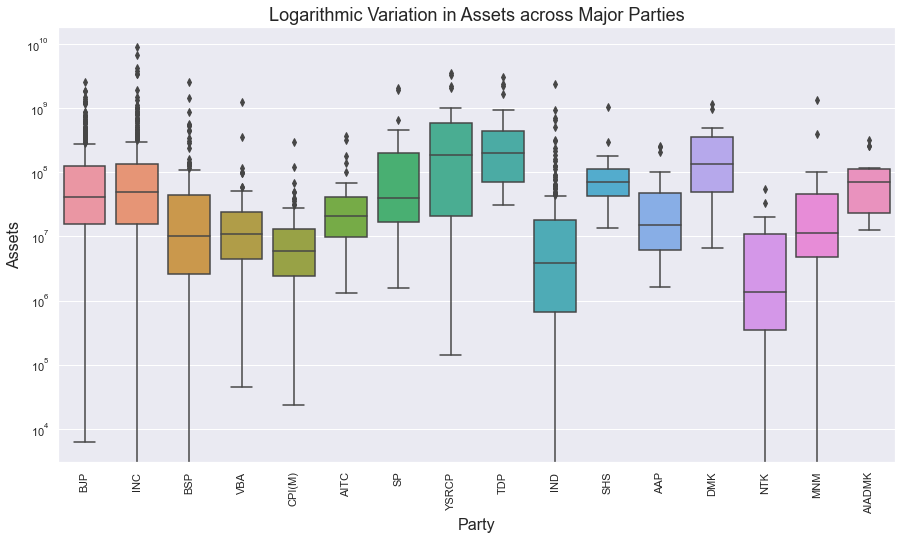

In [30]:
fig,ax = plt.subplots(1,figsize=(15,8))
ax = sns.boxplot(x="Party",y="Assets",data=candidate_2019[candidate_2019["Party"].isin(major_parties)],ax=ax)
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Assets",fontsize=16)
ax.set_title("Logarithmic Variation in Assets across Major Parties",fontsize=18)
plt.savefig("pic/assets/major_party_assets_log.jpg",bbox_inches = "tight")

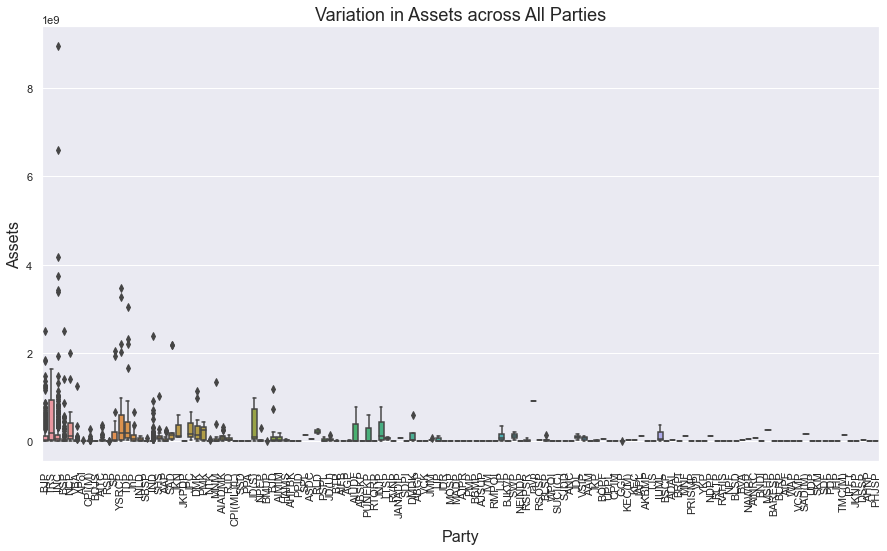

In [31]:
fig,ax = plt.subplots(1,figsize=(15,8))
ax = sns.boxplot(x="Party",y="Assets",data=candidate_2019,ax=ax)
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Assets",fontsize=16)
ax.set_title("Variation in Assets across All Parties",fontsize=18)
plt.savefig("pic/assets/all_party_assets.jpg",bbox_inches = "tight")

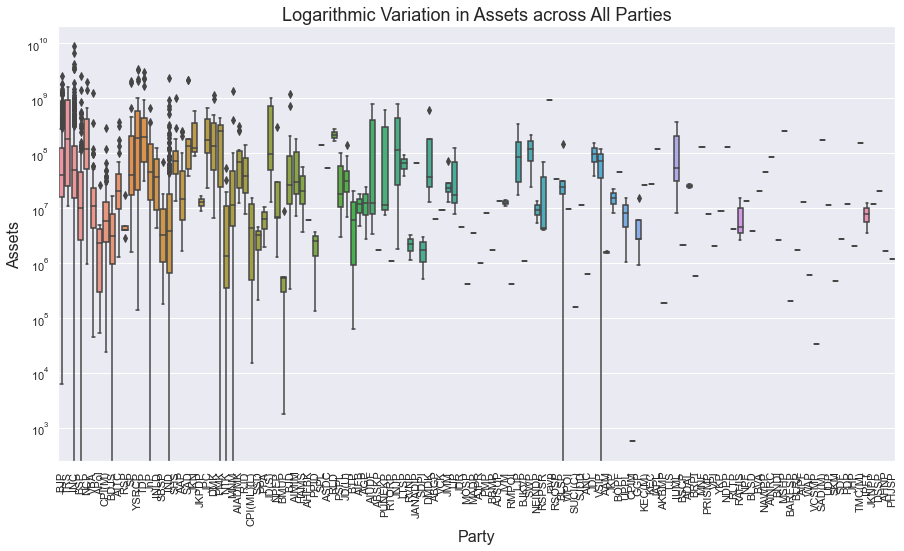

In [32]:
fig,ax = plt.subplots(1,figsize=(15,8))
ax = sns.boxplot(x="Party",y="Assets",data=candidate_2019,ax=ax)
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Assets",fontsize=16)
ax.set_title("Logarithmic Variation in Assets across All Parties",fontsize=18)
plt.savefig("pic/assets/all_party_assets_log.jpg",bbox_inches = "tight")

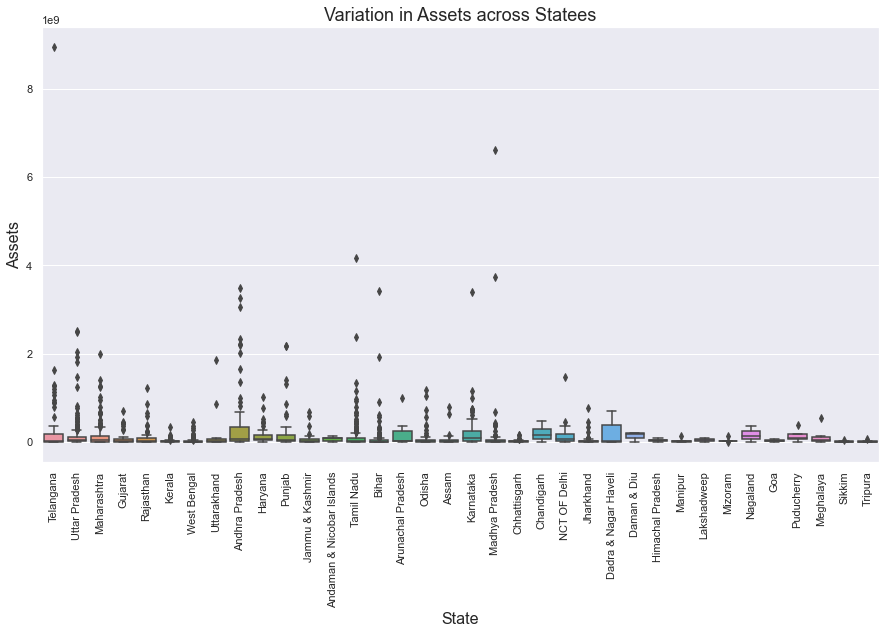

In [33]:
fig,ax = plt.subplots(1,figsize=(15,8))
ax = sns.boxplot(x = "State" , y = "Assets" ,data=candidate_2019,ax=ax)
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("State",fontsize=16)
ax.set_ylabel("Assets",fontsize=16)
ax.set_title("Variation in Assets across Statees",fontsize=18)
plt.savefig("pic/assets/State_assets.jpg",bbox_inches = "tight")

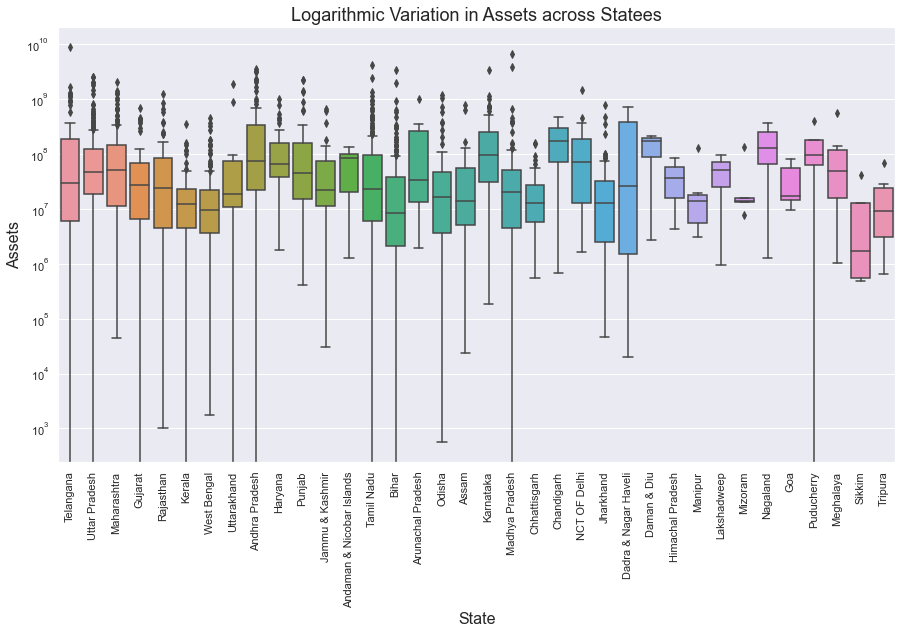

In [34]:
fig,ax = plt.subplots(1,figsize=(15,8))
ax = sns.boxplot(x = "State" , y = "Assets" ,data=candidate_2019,ax=ax)
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("State",fontsize=16)
ax.set_ylabel("Assets",fontsize=16)
ax.set_title("Logarithmic Variation in Assets across Statees",fontsize=18)
plt.savefig("pic/assets/state_assets_log.jpg",bbox_inches = "tight")

In [35]:
fig = px.scatter(candidate_2019, x='Assets', y='Liabilities', 
                 color='State',size='Assets', 
                 height=600,
                 hover_data=(['Name','Party','Constituency','State','Winner']),
                 title='Assets vs Liabilities for All Politicians')
fig.show()

In [36]:
fig = px.scatter(candidate_2019[candidate_2019["Winner"]==1], x='Assets', y='Liabilities', 
                 color='State',size='Assets', 
                 height=600,
                 hover_data=(['Name','Party','Constituency','State','Winner']),
                 title='Assets vs Liabilities for the Winning Politicians')
fig.show()

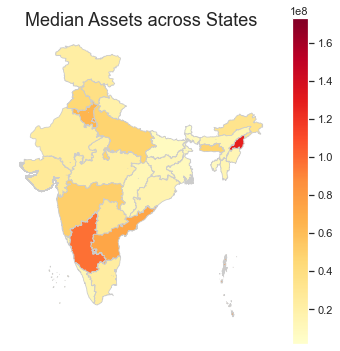

In [37]:
# state_wise_assets = pd.merge(pc_map, pd.DataFrame(candidate_2019.groupby("Constituency")["Assets"].median()), left_index=True, right_index=True)

# fig, ax = plt.subplots(1, figsize=(6, 6))
# ax.axis('off')
# ax.set_title('Median Assets across States', fontsize=18)
# state_wise_assets.plot(column='Assets', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
# plt.savefig("assets/median_assets_states.jpg",bbox_inches = "tight")
candidate_2019['Assets'].astype(int)
state_wise_assets = pd.merge(state_map, pd.DataFrame(candidate_2019.groupby("State")["Assets"].median()), left_index=True, right_index=True)

fig, ax = plt.subplots(1, figsize=(6, 6))
ax.axis('off')
ax.set_title('Median Assets across States', fontsize=18)
state_wise_assets.plot(column='Assets', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
plt.savefig("pic/assets/median_assets_states.jpg",bbox_inches = "tight")

In [38]:
# state_map[''].astype(int)

In [39]:
candidate_2019["assets_rank"] = candidate_2019.groupby(["Constituency"])["Assets"].rank("dense",ascending=False)

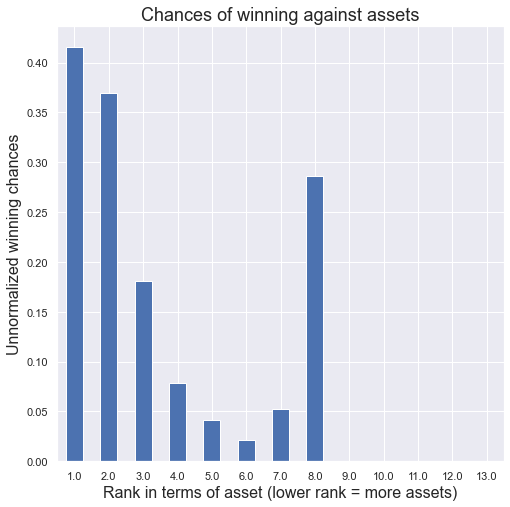

In [40]:
fig = plt.figure(figsize=(8,8))
ax = candidate_2019.groupby("assets_rank")["Winner"].mean().plot.bar(rot=0)
ax.set_xlabel("Rank in terms of asset (lower rank = more assets)",fontsize=16)
ax.set_ylabel("Unnormalized winning chances",fontsize=16)
ax.set_title("Chances of winning against assets",fontsize=18)
plt.savefig("pic/assets/win_assets.jpg", bbox_inches = "tight")

In [41]:
#criminal cases cleaning
candidate_2019["Criminal Cases"].replace("Not Available",0,inplace=True)
candidate_2019["Criminal Cases"] = candidate_2019["Criminal Cases"].astype(np.int32)

In [42]:
candidate_2019["Criminal Cases"].value_counts()

0      1264
1       313
2       119
3       104
4        64
5        42
6        26
7        18
8        16
10       11
9        11
11        5
14        4
12        4
13        3
15        2
16        1
52        1
240       1
31        1
41        1
42        1
28        1
22        1
204       1
24        1
40        1
18        1
Name: Criminal Cases, dtype: int64

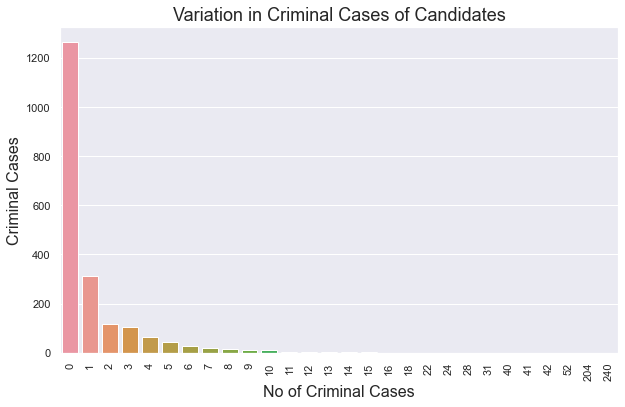

In [43]:
#Using Seaborn's CountPlot with figure size 10 * 6
plt.figure(figsize=(10,6))
ax=sns.countplot(x="Criminal Cases",data=candidate_2019)
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("No of Criminal Cases",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Variation in Criminal Cases of Candidates",fontsize=18)
plt.savefig("pic/criminal/Variation in Criminal Cases of Candidates.jpg", bbox_inches = "tight")

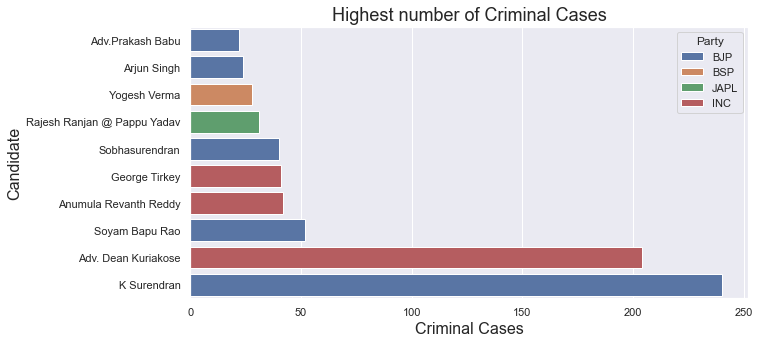

In [44]:
shady_candidates = candidate_2019.loc[candidate_2019["Criminal Cases"].sort_values().index[-10:]]
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(y="Name",x="Criminal Cases", hue="Party", data=shady_candidates, dodge=False)
ax.set_ylabel("Candidate",fontsize=16)
ax.set_xlabel("Criminal Cases",fontsize=16)
ax.set_title("Highest number of Criminal Cases",fontsize=18)
plt.savefig("pic/criminal/most_criminal_cases.jpg",bbox_inches = "tight")

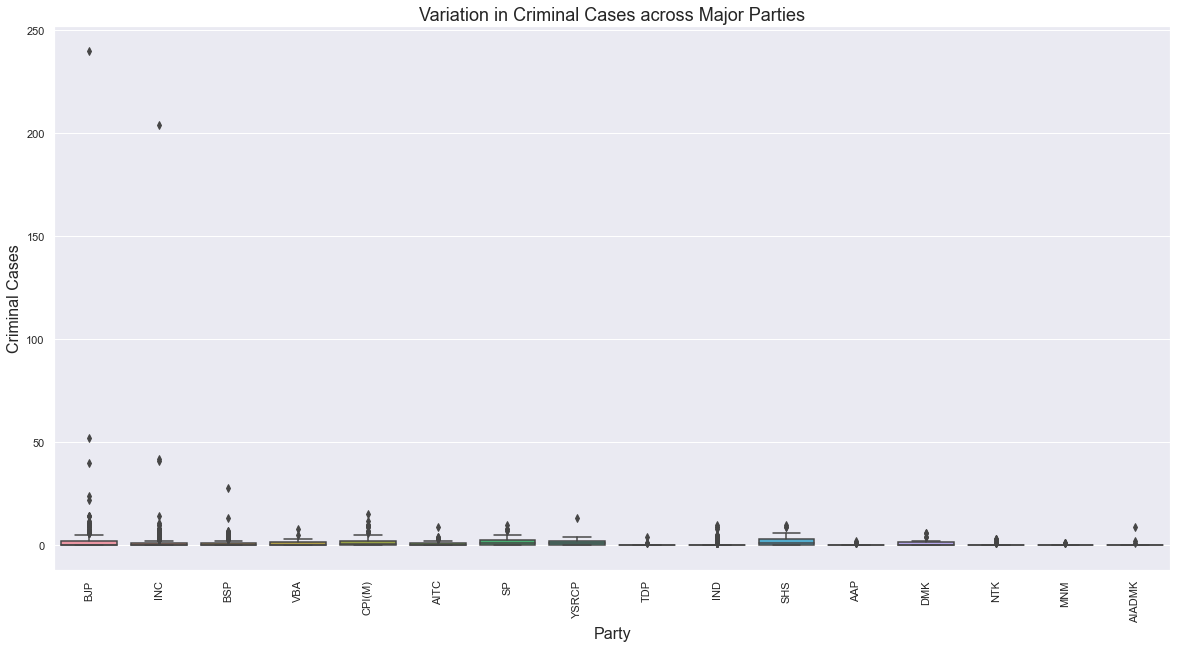

In [45]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Party",y="Criminal Cases",data=candidate_2019[candidate_2019["Party"].isin(major_parties)])
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Variation in Criminal Cases across Major Parties",fontsize=18);
plt.savefig("pic/criminal/party_criminal_cases.jpg",bbox_inches = "tight")

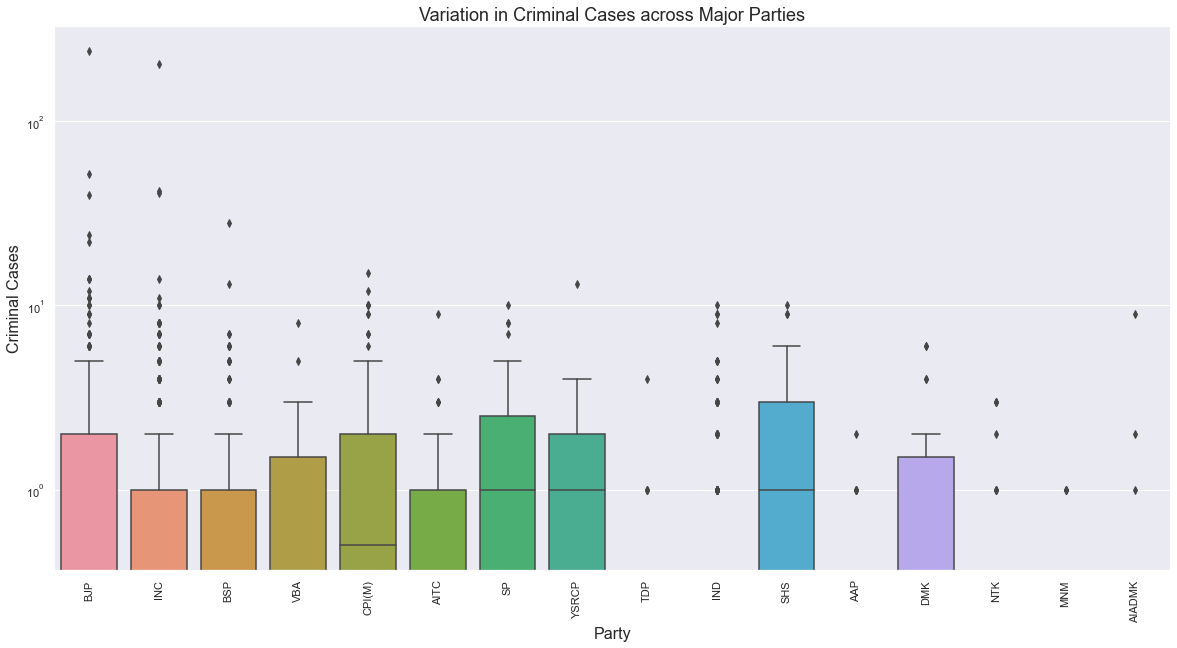

In [46]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Party",y="Criminal Cases",data=candidate_2019[candidate_2019["Party"].isin(major_parties)])
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Variation in Criminal Cases across Major Parties",fontsize=18);
plt.savefig("pic/criminal/party_criminal_cases_log.jpg",bbox_inches = "tight")

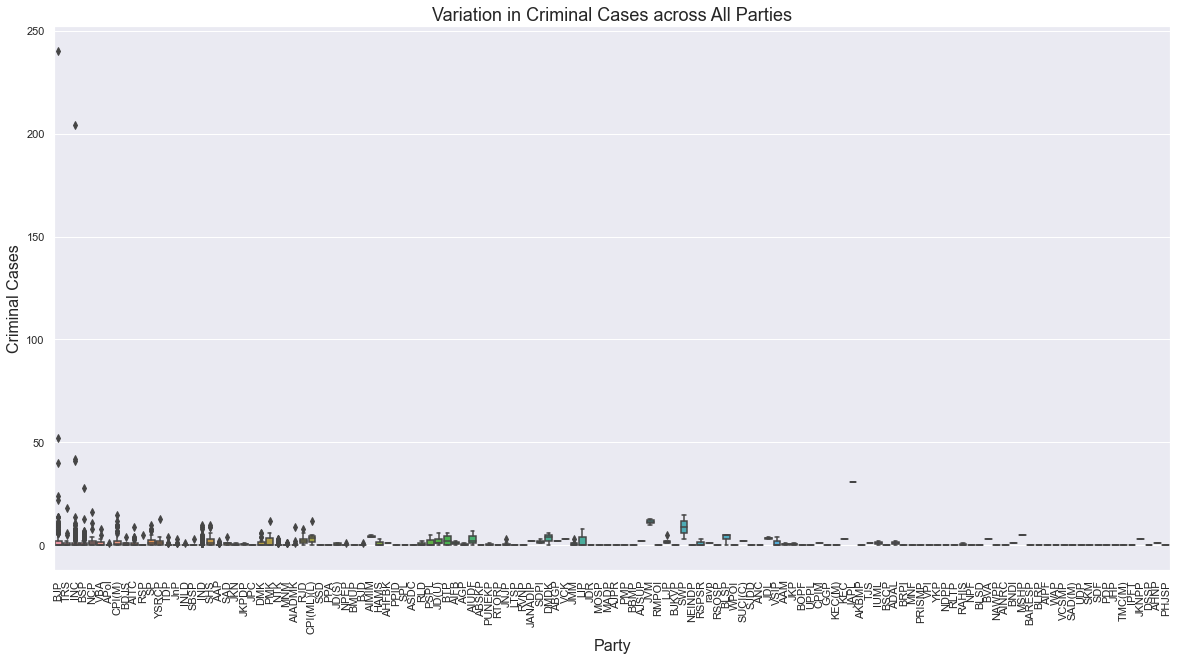

In [47]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax = sns.boxplot(x="Party",y="Criminal Cases" ,data=candidate_2019,ax=ax)
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Variation in Criminal Cases across All Parties",fontsize=18);
plt.savefig("pic/criminal/allparty_criminal_cases.jpg",bbox_inches = "tight")

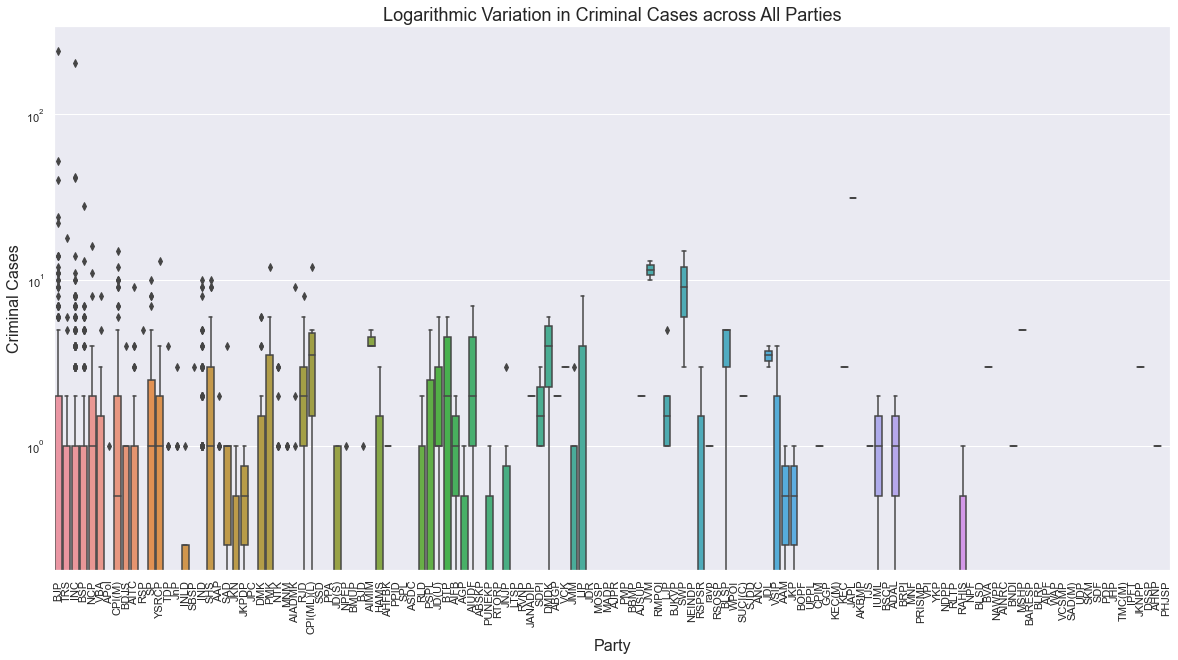

In [48]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax = sns.boxplot(x="Party",y="Criminal Cases" ,data=candidate_2019,ax=ax)
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Party",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Logarithmic Variation in Criminal Cases across All Parties",fontsize=18);
plt.savefig("pic/criminal/log_allparty_criminal_cases.jpg",bbox_inches = "tight")

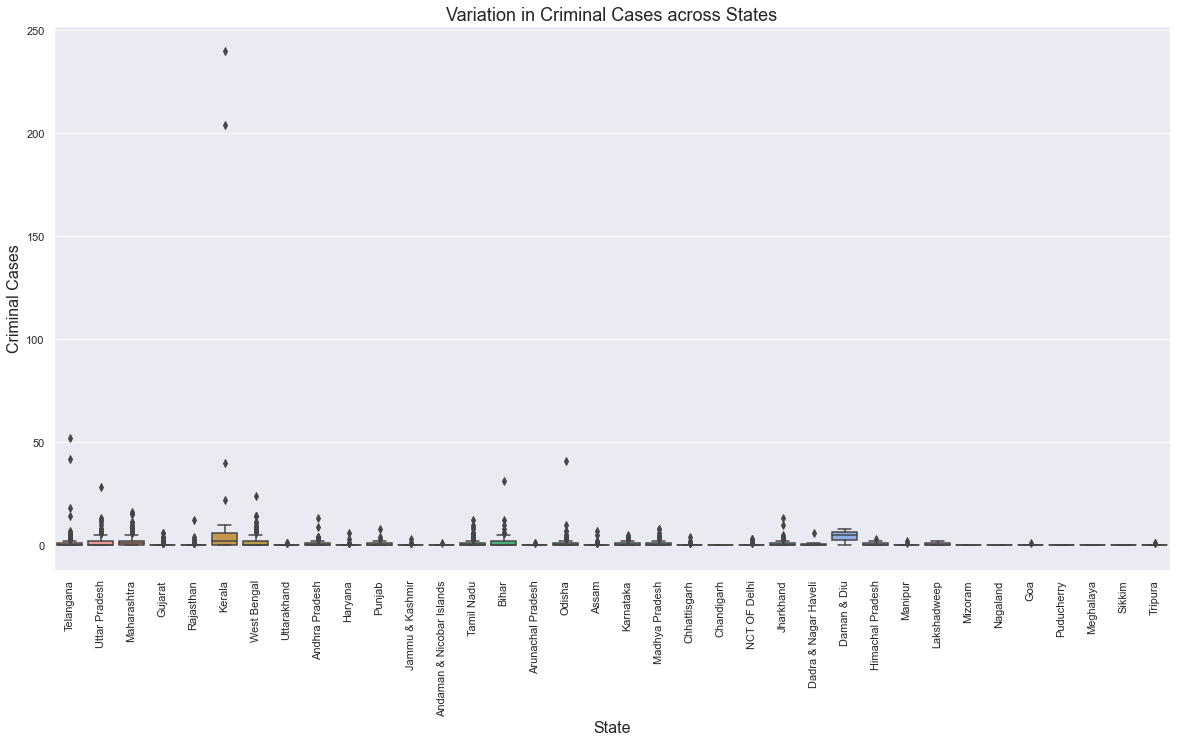

In [49]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax = sns.boxplot(x="State",y="Criminal Cases" ,data=candidate_2019,ax=ax)
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("State",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Variation in Criminal Cases across States",fontsize=18);
plt.savefig("pic/criminal/state_criminal_cases.jpg",bbox_inches = "tight")

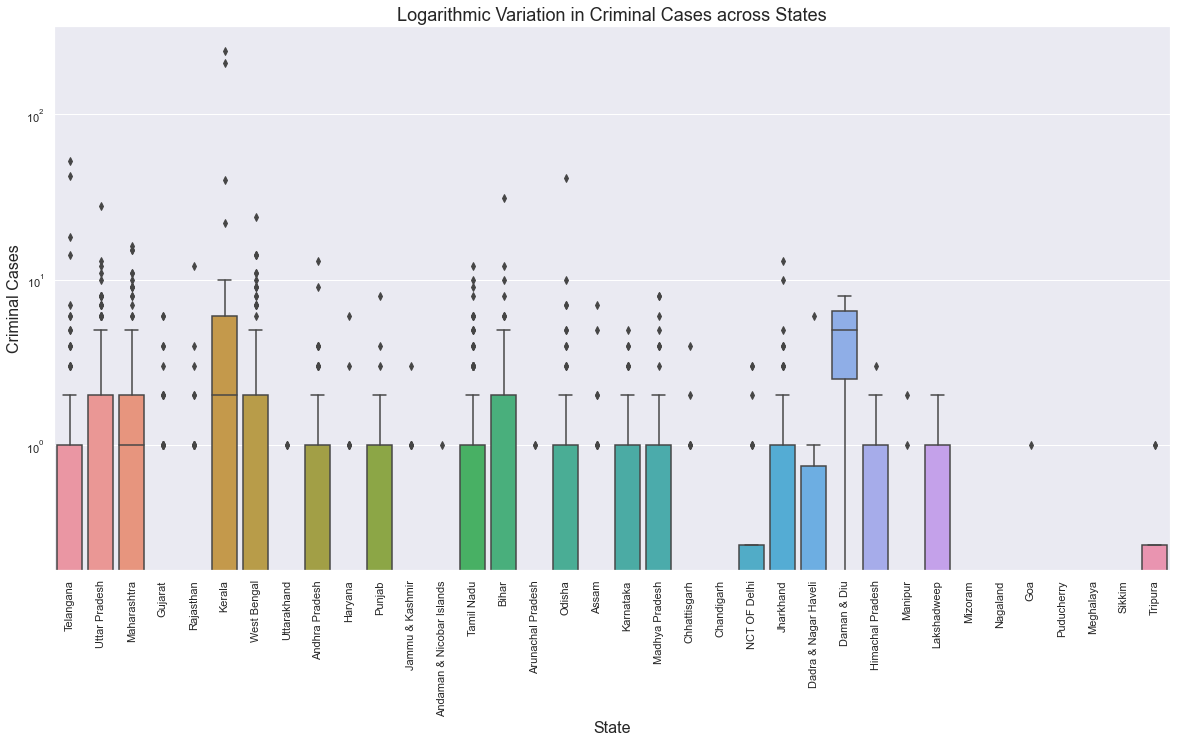

In [50]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax = sns.boxplot(x="State",y="Criminal Cases" ,data=candidate_2019,ax=ax)
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("State",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Logarithmic Variation in Criminal Cases across States",fontsize=18);
plt.savefig("pic/criminal/log_state_criminal_cases.jpg",bbox_inches = "tight")

In [51]:
candidate_2019["cases_rank"] = candidate_2019.groupby(["Constituency"])["Criminal Cases"].rank("dense",ascending=False)


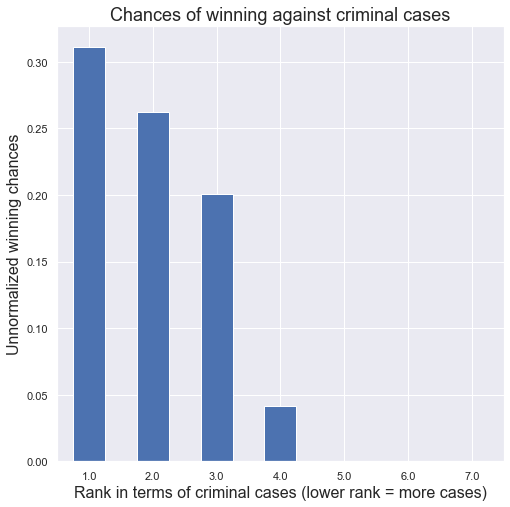

In [52]:
fig = plt.figure(figsize=(8,8))
ax = candidate_2019.groupby("cases_rank")["Winner"].mean().plot.bar(rot=0)
ax.set_xlabel("Rank in terms of criminal cases (lower rank = more cases)",fontsize=16)
ax.set_ylabel("Unnormalized winning chances",fontsize=16)
ax.set_title("Chances of winning against criminal cases",fontsize=18)
plt.savefig("pic/criminal/win_chance_crime.jpg",bbox_inches = "tight")


In [53]:
print(candidate_2019["Education"].value_counts())

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: Education, dtype: int64


In [54]:
edu_level=list(candidate_2019["Education"].value_counts().index[-16:])
edu_count=list(candidate_2019["Education"].value_counts())

In [55]:
print(edu_level[0])
print(edu_count[0])

Post Graduate
502


In [56]:
candidate_2019["Education"].fillna("Literate",inplace=True)
candidate_2019["Education"].replace(['5th Pass','Illiterate','Others','Not Available'],'Iliterate/NA',inplace=True)
candidate_2019["Education"].replace(['8th Pass','10th Pass','12th Pass'],'School Level',inplace=True)
candidate_2019["Education"].replace(['Graduate Professional','Graduate'],'Graduate',inplace=True)
candidate_2019["Education"].replace(['Post Graduate\n','Post Graduate', 'Doctorate'],'Post Graduate/Doctorate',inplace=True)
# candidate_2019["Education_New"]=candidate_2019.apply(update_education,axis=1)

In [57]:
edu_level=list(candidate_2019["Education"].value_counts().index[-16:])
edu_count=list(candidate_2019["Education"].value_counts())

In [58]:
print(candidate_2019["Education"].value_counts())


Graduate                   777
Post Graduate/Doctorate    576
School Level               530
Iliterate/NA               105
Literate                    30
Name: Education, dtype: int64


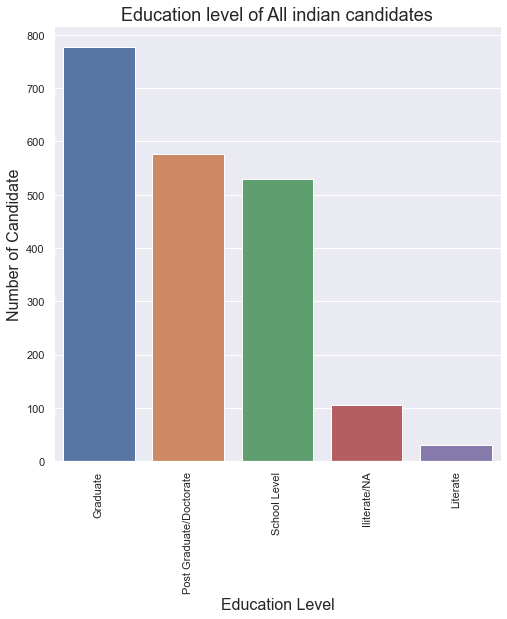

In [59]:
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(y=edu_count,x=edu_level, dodge=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel("Number of Candidate",fontsize=16)
ax.set_xlabel("Education Level",fontsize=16)
ax.set_title("Education level of All indian candidates",fontsize=18)
plt.savefig("pic/education/education_level.jpg",bbox_inches = "tight")


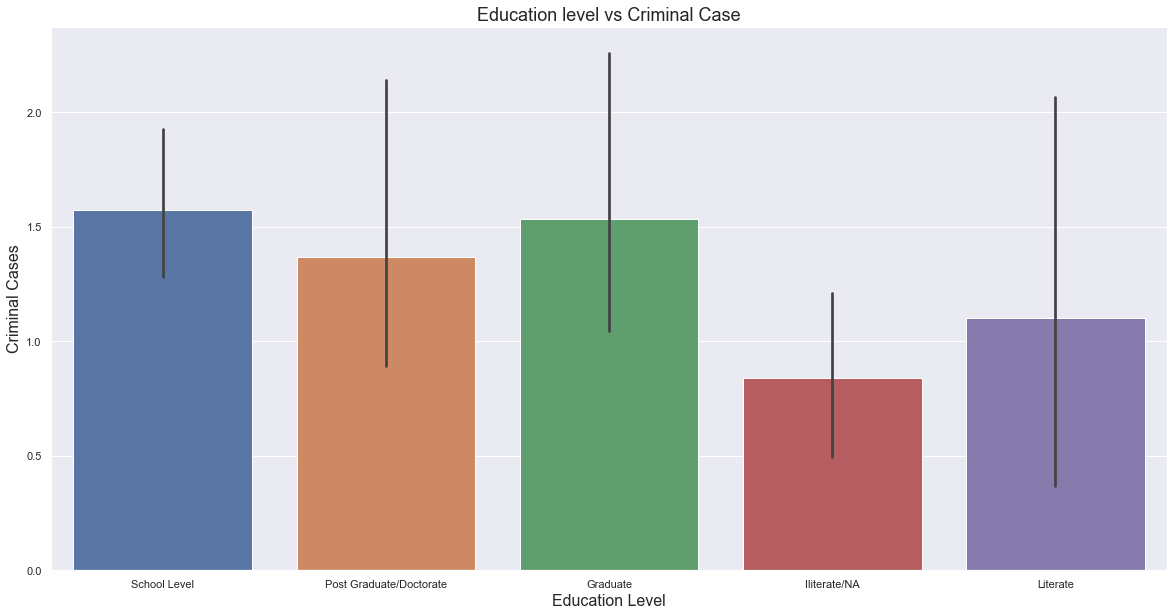

In [60]:
fig,ax = plt.subplots(1,figsize=(20,10))
# ax = sns.boxplot(x=edu_level,y=edu_count,ax=ax)
ax = sns.barplot(x="Education",y="Criminal Cases" ,data=candidate_2019,ax=ax)
# ax.set_yscale("log")
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_xlabel("Education Level",fontsize=16)
ax.set_title("Education level vs Criminal Case",fontsize=18)
plt.savefig("pic/education/edu_level_vs_criminal_barplot.jpg",bbox_inches = "tight")

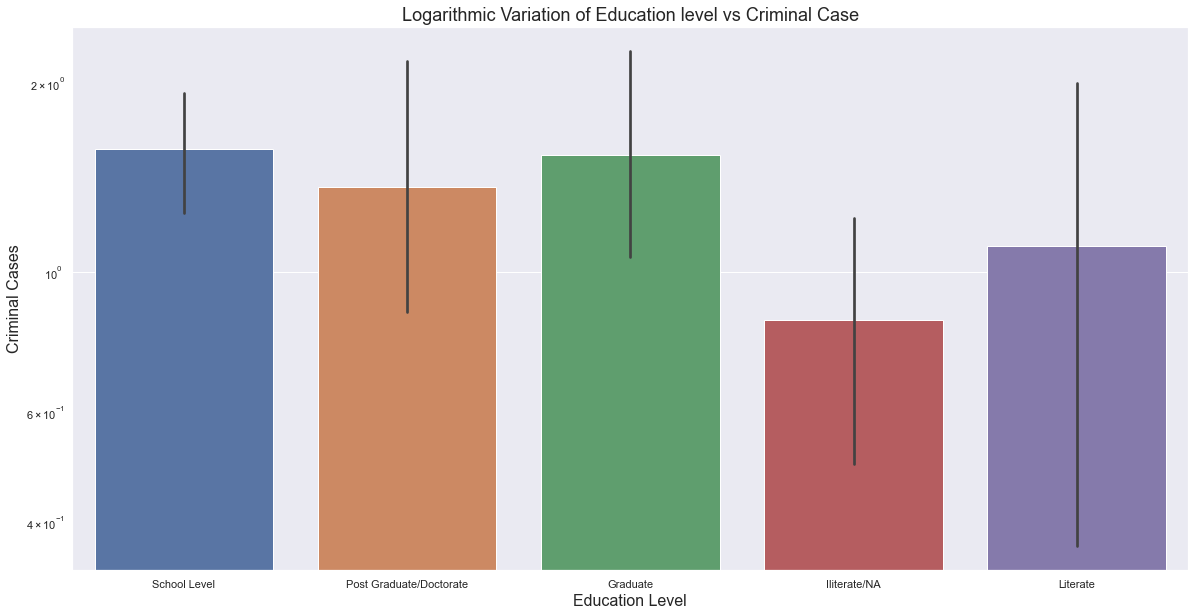

In [61]:
fig,ax = plt.subplots(1,figsize=(20,10))
# ax = sns.boxplot(x=edu_level,y=edu_count,ax=ax)
ax = sns.barplot(x="Education",y="Criminal Cases" ,data=candidate_2019,ax=ax)
ax.set_yscale("log")
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_xlabel("Education Level",fontsize=16)
ax.set_title("Logarithmic Variation of Education level vs Criminal Case",fontsize=18)
plt.savefig("pic/education/edu_level_vs_criminal_barplot_log.jpg",bbox_inches = "tight")

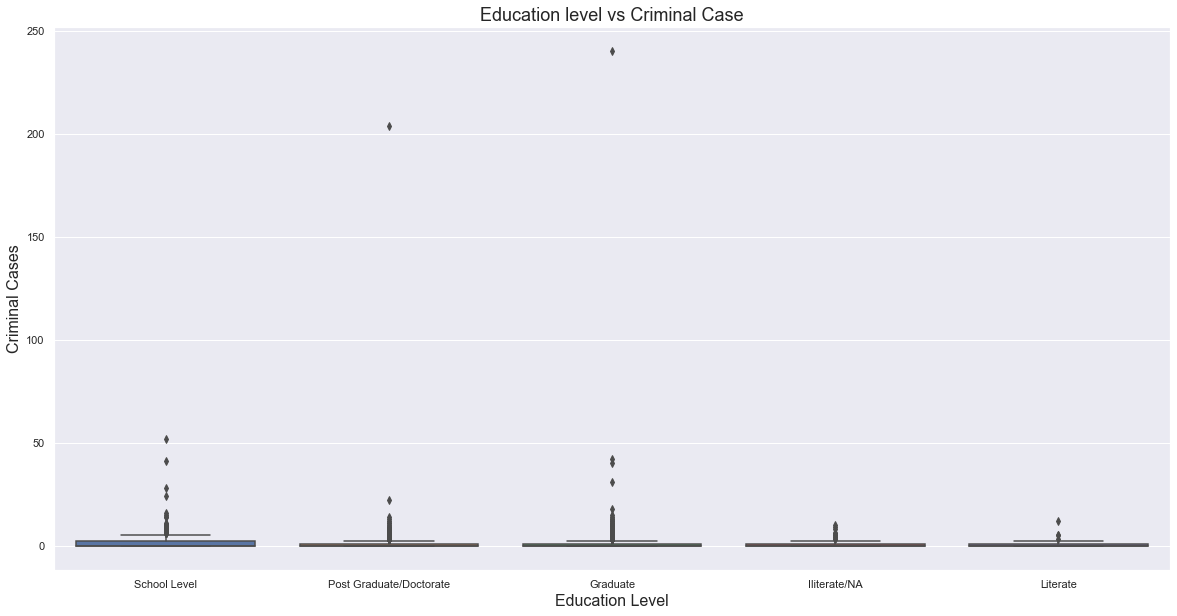

In [62]:
fig,ax = plt.subplots(1,figsize=(20,10))
# ax = sns.boxplot(x=edu_level,y=edu_count,ax=ax)
ax = sns.boxplot(x="Education",y="Criminal Cases" ,data=candidate_2019,ax=ax)
# ax.set_yscale("log")
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_xlabel("Education Level",fontsize=16)
ax.set_title("Education level vs Criminal Case",fontsize=18)
plt.savefig("pic/education/edu_level_vs_criminal_boxplot.jpg",bbox_inches = "tight")

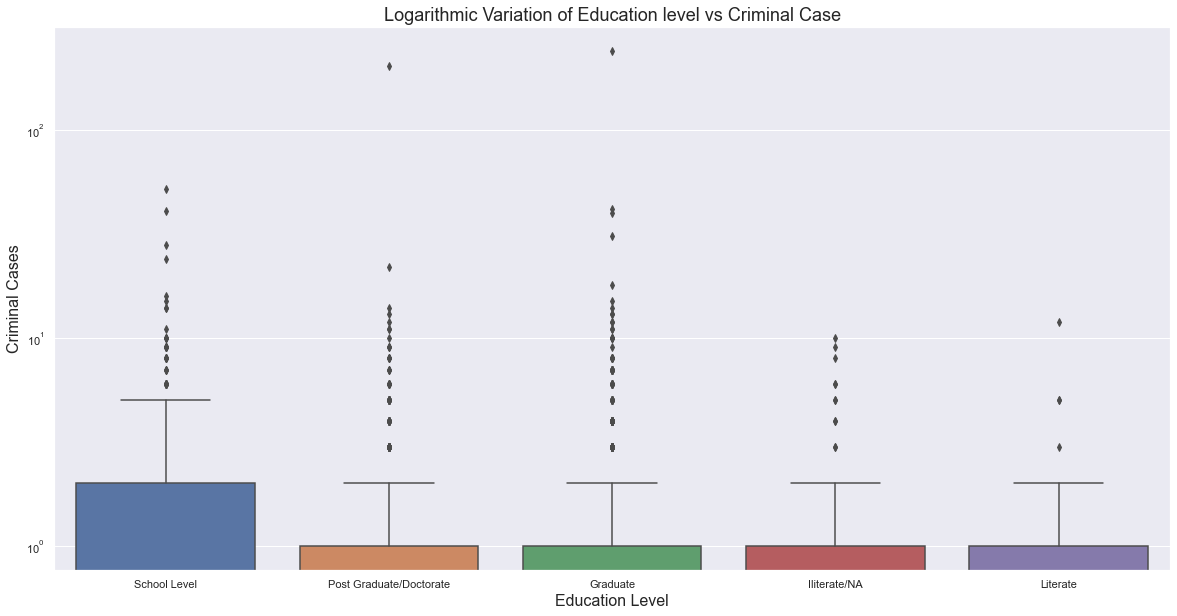

In [63]:
fig,ax = plt.subplots(1,figsize=(20,10))
# ax = sns.boxplot(x=edu_level,y=edu_count,ax=ax)
ax = sns.boxplot(x="Education",y="Criminal Cases" ,data=candidate_2019,ax=ax)
ax.set_yscale("log")
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_xlabel("Education Level",fontsize=16)
ax.set_title("Logarithmic Variation of Education level vs Criminal Case",fontsize=18)
plt.savefig("pic/education/edu_level_vs_criminal_boxplot_log.jpg",bbox_inches = "tight")

In [64]:
# for i in candidate_2019["Education"]:
#   if(i=="Post Graduate/Doctorate"):
#     candidate_2019["edu_rank"] = 1
#   elif(i=="Graduate"):
#     candidate_2019["edu_rank"] = 2
#   elif(i=="12th Pass"):
#     candidate_2019["edu_rank"] = 3
#   elif(i=="10th Pass"):
#     candidate_2019["edu_rank"] = 4
#   elif(i=="8th Pass"):
#     candidate_2019["edu_rank"] = 5
#   elif(i=="5th Pass"):
#     candidate_2019["edu_rank"] = 6
#   elif(i=="Literate"):
#     candidate_2019["edu_rank"] = 7
#   elif(i=="Iliterate/NA"):
#     candidate_2019["edu_rank"] = 8


# def sort_party(data):
#     if data['Education'] == major_parties:
#         return 'Other'
#     else:
#         return data['Party']

# # Calling the method
# vote_Share_df['Party New'] = vote_Share_df.apply(sort_party, axis=1)
# vote_count = vote_Share_df.groupby('Party New')['Total Votes'].sum()
# vote_Share_df.head()


In [65]:
# for i in candidate_2019["Education"]:
def sort_edurank(data):
  if(data["Education"]=="Post Graduate/Doctorate"):
    return 1
  elif(data["Education"]=="Graduate"):
    return 2
  elif(data["Education"]=="12th Pass"):
    return 3
  elif(data["Education"]=="10th Pass"):
    return 4
  elif(data["Education"]=="8th Pass"):
    return 5
  elif(data["Education"]=="5th Pass"):
    return 6
  elif(data["Education"]=="Literate"):
    return 7
  else:
    return 8


# Calling the method
candidate_2019['edu_rank'] = candidate_2019.apply(sort_edurank, axis=1)


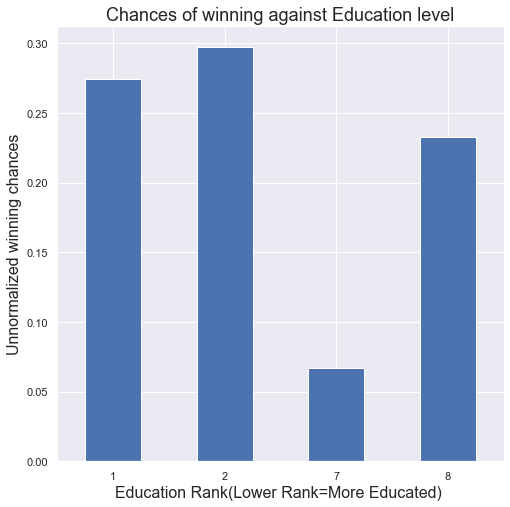

In [66]:

fig = plt.figure(figsize=(8,8))
ax = candidate_2019.groupby("edu_rank")["Winner"].mean().plot.bar(rot=0)
# ax = candidate_2019.groupby("Education")["Winner"].mean().plot.bar(rot=0)
ax.set_xlabel("Education Rank(Lower Rank=More Educated) ",fontsize=16)
ax.set_ylabel("Unnormalized winning chances",fontsize=16)
ax.set_title("Chances of winning against Education level",fontsize=18)
plt.savefig("pic/education/win_chance_education.jpg",bbox_inches = "tight")


In [67]:
# candidate_2019["edu_rank"]

In [68]:
candidate_2019["Education"].value_counts()

Graduate                   777
Post Graduate/Doctorate    576
School Level               530
Iliterate/NA               105
Literate                    30
Name: Education, dtype: int64

In [69]:
candidate_2019["Gender"].value_counts()

MALE      1760
FEMALE     258
Name: Gender, dtype: int64

In [70]:
#Group by them Gender and count the number of occurenece in each group
gender = candidate_2019.groupby('Gender')[['Name']].count()

#Only choose records of the Winner
gender_winner = candidate_2019[candidate_2019['Winner']>0].groupby('Gender')[['Name']].count()

gender_df=pd.DataFrame(data=gender)
gender_df.reset_index(level=0, inplace=True)
gender_df['Category'] = 'Total'

gender_winner_df=pd.DataFrame(data=gender_winner)
gender_winner_df.reset_index(level=0, inplace=True)
gender_winner_df['Category'] = 'Winner'

gender_df=pd.concat((gender_df,gender_winner_df))
gender_df.head()

,Gender,Name,Category
0,FEMALE,258,Total
1,MALE,1760,Total
0,FEMALE,76,Winner
1,MALE,463,Winner


Text(0.5, 1.0, 'Gender Distribution of Candidates')

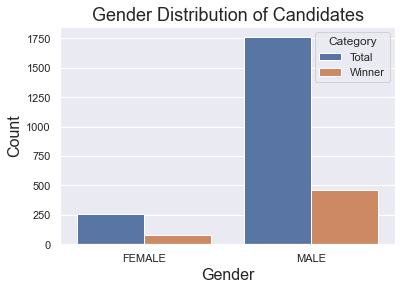

In [71]:
fig = plt.subplots()
# ax = sns.barplot(x=d2["value"],y=d2["Party"], hue=d2["seats"], data=d2, dodge=False)
ax=sns.barplot(data=gender_df,y='Name',x='Gender', hue='Category')
# plt.xticks(rotation=270)
ax.set_ylabel("Count",fontsize=16)
ax.set_xlabel("Gender",fontsize=16)
ax.set_title("Gender Distribution of Candidates",fontsize=18)

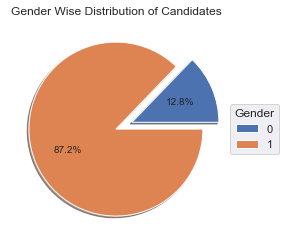

In [72]:
fig, axes = plt.subplots()
axes.pie(gender['Name'], explode = (0.2,0) ,  autopct='%1.1f%%' , shadow=True)
axes.legend( gender.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title("Gender Wise Distribution of Candidates")
plt.savefig("pic/gender/gender_candidate.jpg",bbox_inches = "tight")


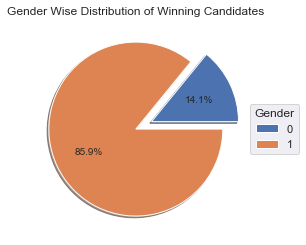

In [73]:
fig, axes = plt.subplots()
axes.pie(gender_winner['Name'], explode = (0.2,0) ,  autopct='%1.1f%%' , shadow=True)
axes.legend( gender_winner.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title("Gender Wise Distribution of Winning Candidates")
plt.savefig("pic/gender/gender_winning_candidate.jpg",bbox_inches = "tight")


In [74]:
#Group by them Category and count the number of occurenece in each group
category = candidate_2019.groupby('Category')[['Name']].count()

#Only choose records of the Winner
category_winner = candidate_2019[candidate_2019['Winner']>0].groupby('Category')[['Name']].count()

category

,Name
Category,
GENERAL,1392
SC,383
ST,243


In [75]:

category_df=pd.DataFrame(data=category)
category_df.reset_index(level=0, inplace=True)
category_df['Type'] = 'Total'

category_winner_df=pd.DataFrame(data=category_winner)
category_winner_df.reset_index(level=0, inplace=True)
category_winner_df['Type'] = 'Winner'

category_df=pd.concat((category_df,category_winner_df))
category_df.head(6)

,Category,Name,Type
0,GENERAL,1392,Total
1,SC,383,Total
2,ST,243,Total
0,GENERAL,399,Winner
1,SC,85,Winner
2,ST,55,Winner


Text(0.5, 1.0, 'Category Distribution of Candidates')

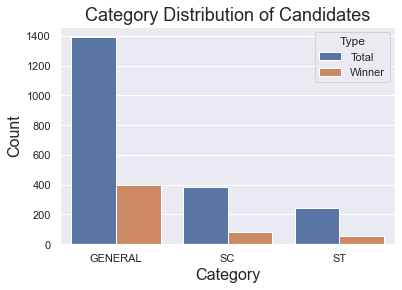

In [76]:
fig = plt.subplots()
# ax = sns.barplot(x=d2["value"],y=d2["Party"], hue=d2["seats"], data=d2, dodge=False)
ax=sns.barplot(data=category_df,y='Name',x='Category', hue='Type')
# plt.xticks(rotation=270)
ax.set_ylabel("Count",fontsize=16)
ax.set_xlabel("Category",fontsize=16)
ax.set_title("Category Distribution of Candidates",fontsize=18)

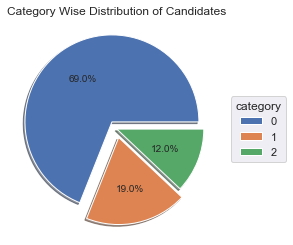

In [77]:
fig, axes = plt.subplots()
axes.pie(category['Name'], explode = (0.1,0.1,0) ,  autopct='%1.1f%%' , shadow=True)
axes.legend( category.index, title="category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title("Category Wise Distribution of Candidates")
plt.savefig("pic/category/category_candidate.jpg",bbox_inches = "tight")

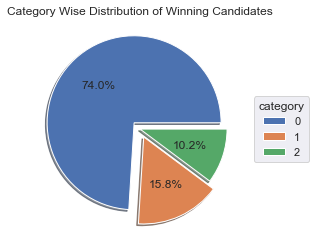

In [ ]:
fig, axes = plt.subplots()
axes.pie(category_winner['Name'], explode = (0.1,0.1,0) ,  autopct='%1.1f%%' , shadow=True)
axes.legend( category_winner.index, title="category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title("Category Wise Distribution of Winning Candidates")
plt.savefig("pic/category/category_winning_candidate.jpg",bbox_inches = "tight")

In [ ]:
age_data=candidate_2019.groupby(['Age','Gender']).count()
age_data.reset_index(level=-1, inplace=True)
age_data.reset_index(level=-1, inplace=True)

In [ ]:
fig = px.histogram(age_data, 
                   x="Age",y='Name',color='Gender',
                   title='Age Counts Distribution among the politicians')
fig.update_layout(title_text='Age Counts Distribution among the politicians on basis of Gender')
fig.show()

In [ ]:
age_data=candidate_2019.groupby(['Age','Winner']).count()
age_data.reset_index(level=-1, inplace=True)
age_data.reset_index(level=-1, inplace=True)

In [ ]:
fig = px.histogram(age_data, 
                   x="Age",y='Name',color='Winner',
                   title='Age Counts Distribution among the politicians')
fig.update_layout(title_text='Age Counts Distribution among the winning politicians')
fig.show()

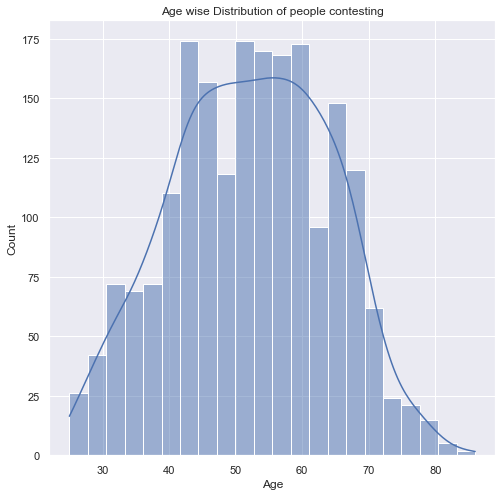

In [ ]:
# Plotting 2 graphs side by side
fig, axes = plt.subplots(1, figsize=(8,8))

# histplot directly gives us the count of the column given to it
sns.histplot(candidate_2019.Age  , ax=axes, kde=True)
axes.set_title("Age wise Distribution of people contesting") # setting title for the plot
plt.savefig("pic/age/age_candidate.jpg",bbox_inches = "tight")

plt.show()

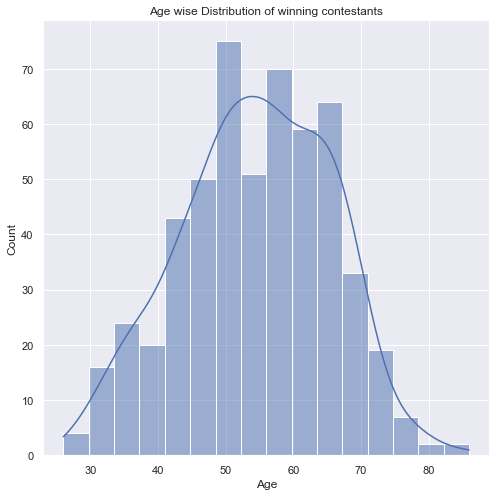

In [ ]:
# Plotting 2 graphs side by side
fig, axes = plt.subplots(1, figsize=(8,8))


# We can change the no of bins and also the width of the bins
sns.histplot(candidate_2019[candidate_2019["Winner"]>0]["Age"] , ax=axes, kde=True)
axes.set_title("Age wise Distribution of winning contestants") # setting title for the plot
plt.savefig("pic/age/age_winning_candidate.jpg",bbox_inches = "tight")


plt.show()

In [ ]:
candidate_2019.head()

,State,Constituency,Name,Winner,Party,Symbol,Gender,Criminal Cases,Age,Category,...,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors,assets_rank,cases_rank,edu_rank
0,Telangana,ADILABAD,Soyam Bapu Rao,1,BJP,Lotus,MALE,52,52.0,ST,...,231450.0,376892,482,377374,25.330684,35.468248,1489790,3.0,1.0,3
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,...,847000.0,318665,149,318814,21.399929,29.964370,1489790,2.0,3.0,1
2,Telangana,ADILABAD,Rathod Ramesh,0,INC,Hand,MALE,3,52.0,ST,...,15300000.0,314057,181,314238,21.092771,29.534285,1489790,1.0,2.0,3
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,...,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,2.0,1.0,1
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,...,22251891.0,434199,1130,435329,22.466390,37.999125,1937690,1.0,2.0,1


In [ ]:
state_wise_assets = candidate_2019.groupby("State")["Assets"].median()
print(state_wise_assets.head())

State
Andaman & Nicobar Islands    85140573.0
Andhra Pradesh               73049918.0
Arunachal Pradesh            32784415.0
Assam                        14017906.0
Bihar                         8292428.0
Name: Assets, dtype: float64


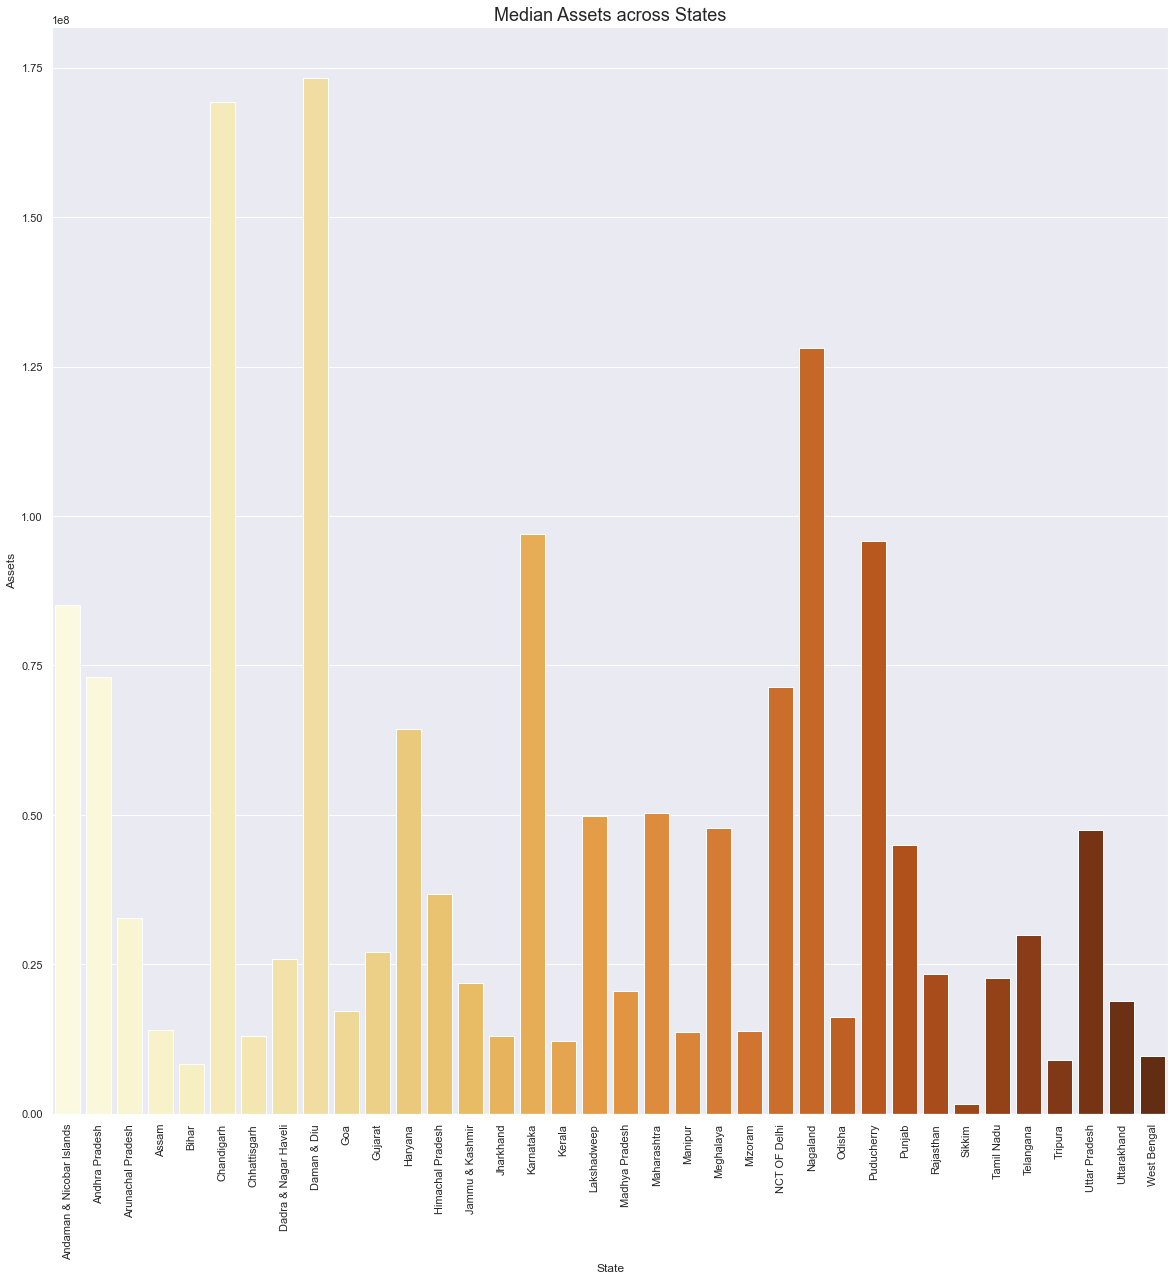

In [ ]:

fig, ax = plt.subplots(1, figsize=(20, 20))
sns.barplot(x = state_wise_assets.index , y = state_wise_assets , ax=ax, palette='YlOrBr')
ax.set_title('Median Assets across States', fontsize=18)
ax.tick_params(axis='x' , rotation=90);
# state_wise_assets.plot(column='Assets', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
plt.savefig("median_assets_states.jpg",bbox_inches = "tight")


In [ ]:
state_wise_assets_winner = candidate_2019[candidate_2019['Winner']>0].groupby("State")["Assets"].median()
print(state_wise_assets_winner.head())
     

State
Andaman & Nicobar Islands    132233012.0
Andhra Pradesh               202528594.0
Arunachal Pradesh             75953629.5
Assam                         14017906.0
Bihar                         41036294.0
Name: Assets, dtype: float64


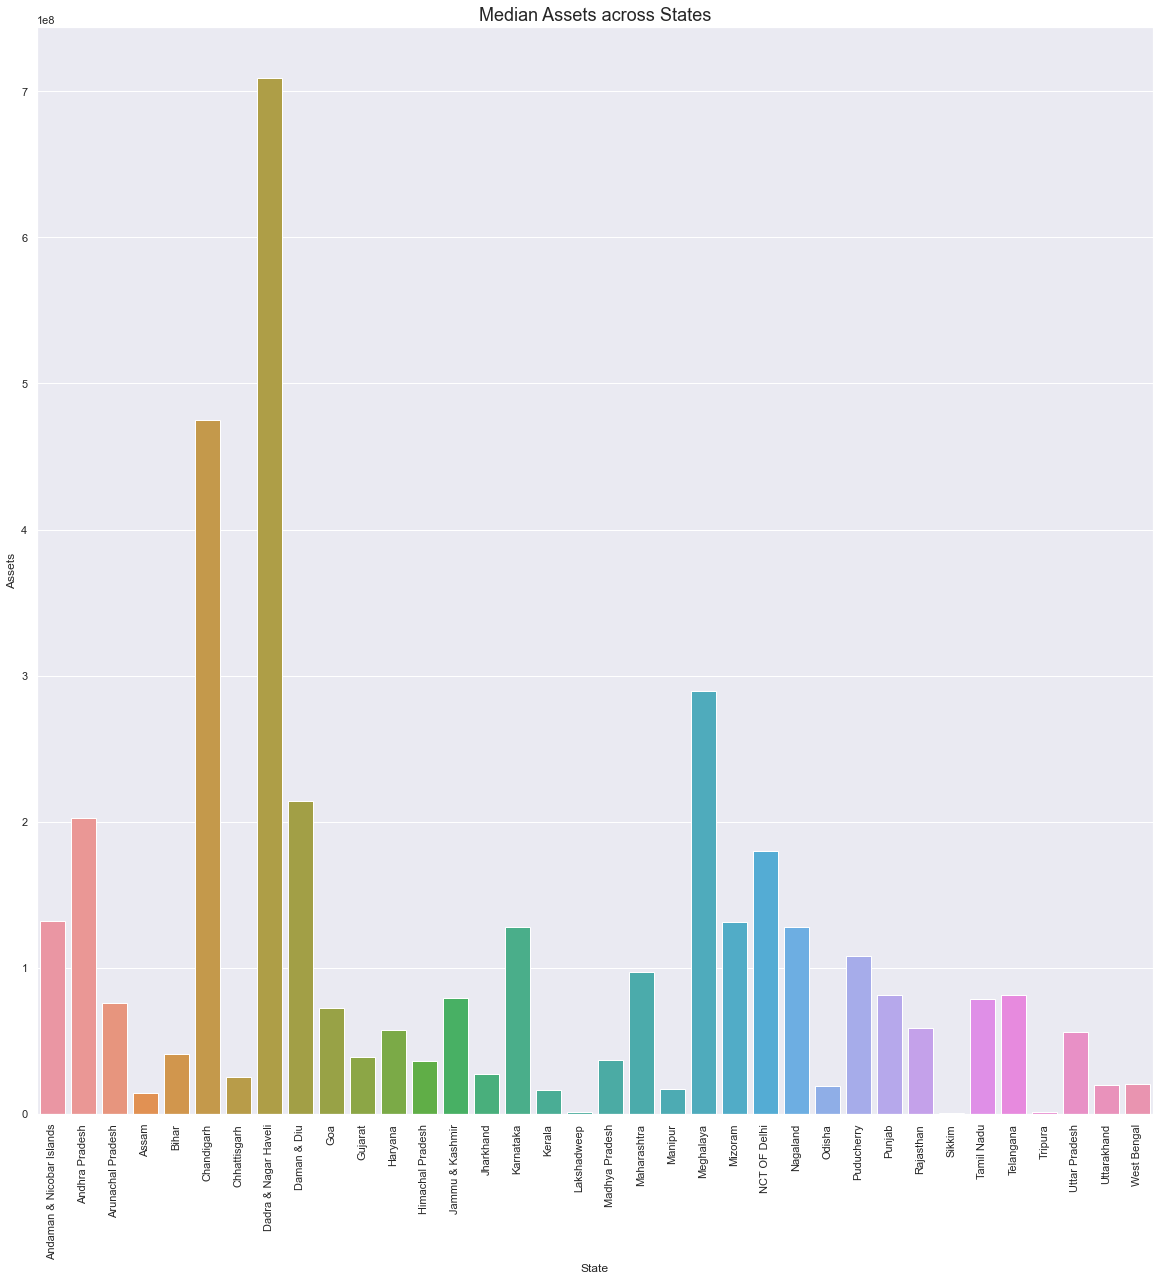

In [ ]:

fig, ax = plt.subplots(1, figsize=(20, 20))
sns.barplot(x = state_wise_assets_winner.index , y = state_wise_assets_winner , ax=ax)
ax.set_title('Median Assets across States', fontsize=18)
ax.tick_params(axis='x' , rotation=90)
# state_wise_assets_winner.plot(column='Assets', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
plt.savefig("median_assets_states_winner.jpg",bbox_inches = "tight")


In [ ]:
df=pd.read_json("election2019.json")
df.head(10)

,Name,Reserved,State,Constituency No,Coordinate,stateCode,stateFullName
0,Araku,ST,AP,1,"[29, 23]",S01,Andhra Pradesh
1,Srikakulam,None,AP,2,"[31, 23]",S01,Andhra Pradesh
2,Visakhapatnam,None,AP,4,"[30, 24]",S01,Andhra Pradesh
3,Vizianagaram,None,AP,3,"[32, 24]",S01,Andhra Pradesh
4,Kakinada,None,AP,6,"[29, 25]",S01,Andhra Pradesh
5,Anakapalli,None,AP,5,"[31, 25]",S01,Andhra Pradesh
6,Vijayawada,None,AP,12,"[22, 26]",S01,Andhra Pradesh
7,Eluru,None,AP,10,"[24, 26]",S01,Andhra Pradesh
8,Rajahmundry,None,AP,8,"[26, 26]",S01,Andhra Pradesh
9,Narasapuram,None,AP,9,"[28, 26]",S01,Andhra Pradesh


In [ ]:
# df["Coordinate"]=[float].split(',')
print(df["Coordinate"][0][0]) 
# = [float(x.split(",")) for x in df["Coordinate"]]

# df.head(10)

29


In [ ]:
import matplotlib.pyplot as plt
xar=[]
yar=[]
for i in df["Coordinate"]:
  xar.append(i[0])
  yar.append(i[1])

df.insert(4, "x", xar, True)
df.insert(5, "y", yar, True)

df.head(10)

,Name,Reserved,State,Constituency No,x,y,Coordinate,stateCode,stateFullName
0,Araku,ST,AP,1,29,23,"[29, 23]",S01,Andhra Pradesh
1,Srikakulam,None,AP,2,31,23,"[31, 23]",S01,Andhra Pradesh
2,Visakhapatnam,None,AP,4,30,24,"[30, 24]",S01,Andhra Pradesh
3,Vizianagaram,None,AP,3,32,24,"[32, 24]",S01,Andhra Pradesh
4,Kakinada,None,AP,6,29,25,"[29, 25]",S01,Andhra Pradesh
5,Anakapalli,None,AP,5,31,25,"[31, 25]",S01,Andhra Pradesh
6,Vijayawada,None,AP,12,22,26,"[22, 26]",S01,Andhra Pradesh
7,Eluru,None,AP,10,24,26,"[24, 26]",S01,Andhra Pradesh
8,Rajahmundry,None,AP,8,26,26,"[26, 26]",S01,Andhra Pradesh
9,Narasapuram,None,AP,9,28,26,"[28, 26]",S01,Andhra Pradesh


The location of the center of the hexagon is [Coordinate[0] * radius, Coordinate[1] * 1.5 * radius / Math.cos (Math.PI / 6)]

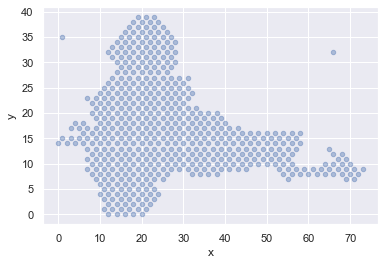

In [ ]:
df.plot(kind="scatter", x="x", y="y", alpha=0.4)
plt.show()

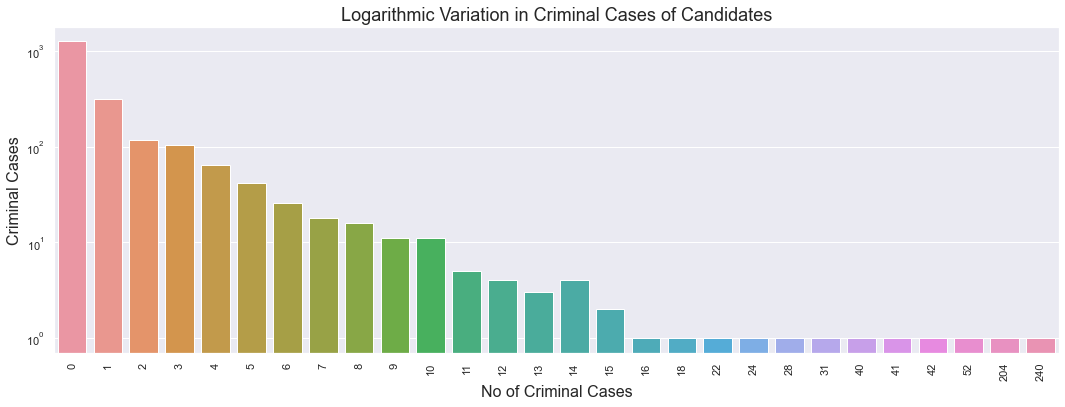

In [ ]:
#Using Seaborn's CountPlot with figure size 10 * 6
plt.figure(figsize=(18,6))
ax=sns.countplot(x="Criminal Cases",data=candidate_2019)
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("No of Criminal Cases",fontsize=16)
ax.set_ylabel("Criminal Cases",fontsize=16)
ax.set_title("Logarithmic Variation in Criminal Cases of Candidates",fontsize=18);

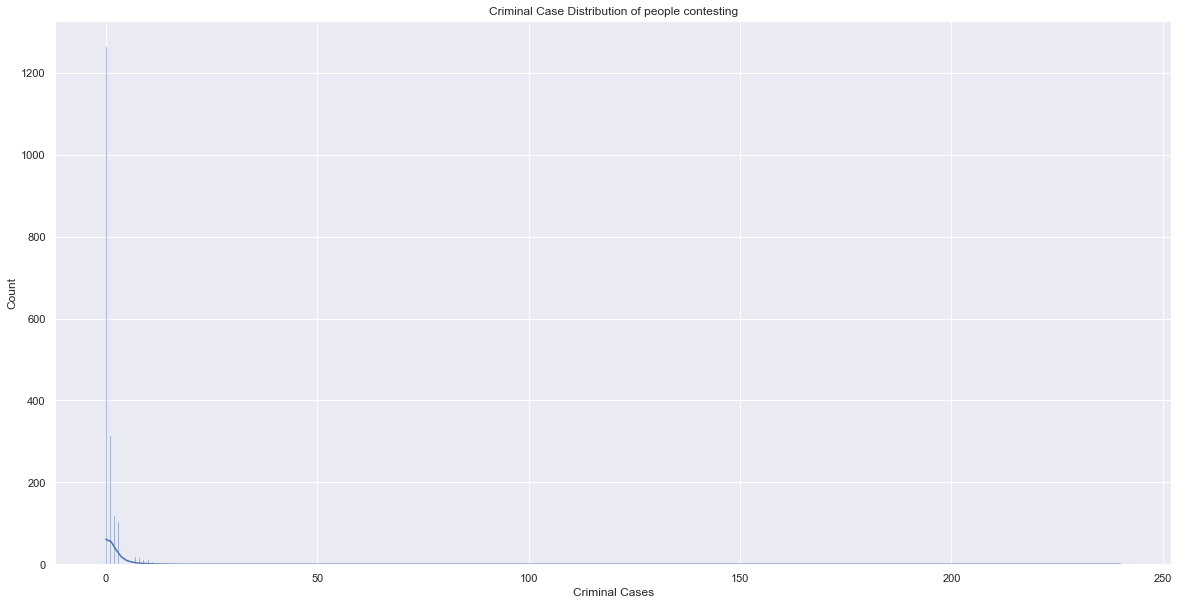

In [ ]:

fig, axes = plt.subplots(figsize=(20, 10))

# histplot directly gives us the count of the column given to it
sns.histplot(candidate_2019["Criminal Cases"]  , ax=axes, kde=True);
axes.set_title("Criminal Case Distribution of people contesting") # setting title for the plot

plt.show();